In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
data = pd.read_csv("../dataset/movie_metadata.csv")
display(data.head(10))

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
print(data['title_year'].value_counts().sort_index())

1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
Name: title_year, Length: 91, dtype: int64


We conclude that we have movies from the year 1916 to 2016(a century of movie-data)

In [4]:
print("The number of movies are:", data.shape[0], " with each movie having", data.shape[1]," characterstics.")

The number of movies are: 5043  with each movie having 28  characterstics.


Lets see how many movies were released per year

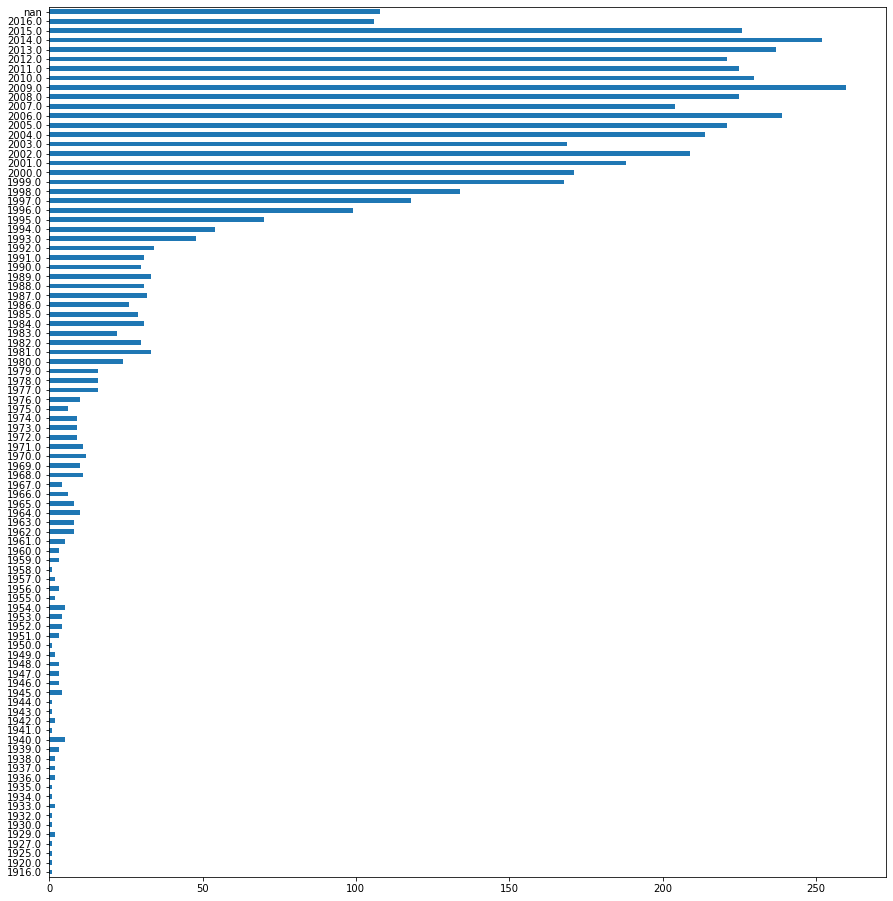

In [5]:
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(15, 16))
# plt.tight_layout()

Lets observe the main feature: **Movie Title**

In [6]:
print(data.movie_title[:10], "\n\n")
print((data.movie_title == 'Avatar').sum())
print((data.movie_title == 'Avatar\xa0').sum())

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
5                                         John Carter 
6                                        Spider-Man 3 
7                                             Tangled 
8                             Avengers: Age of Ultron 
9              Harry Potter and the Half-Blood Prince 
Name: movie_title, dtype: object 


0
1


Hence, while searching for a movie w.r.t. search parameter being the movie name itself, we need to be sure to include the end-of-sentence character sequence - **\xa0** at the end of each movie name that we want to query.


**\xa0** is actually non-breaking space in Latin1 (ISO 8859-1), also chr(160). You should replace it with a space.

In [7]:
# data = data.loc[:, ['']]
for x in data.columns:
    print(x)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


Pull out the important details from the data, which are actually of use to our website

In [8]:
data = data.loc[:, [
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'genres',
    'movie_title'    
]]
display(data.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [9]:
for colName in data.columns:
    if colName.endswith("_name"):
        data[colName].replace(np.nan, 'unknown', inplace=True)

In [10]:
for colName in data.columns:
    if colName.endswith("_name"):
        print("Number of NaN values for", colName, "are", data[colName].isnull().sum())

Number of NaN values for director_name are 0
Number of NaN values for actor_1_name are 0
Number of NaN values for actor_2_name are 0
Number of NaN values for actor_3_name are 0


* genres are given as Action|Adventure|Comedy...
    * we need to replace this pipe character, to space, for ease of splitting
    
* lower case all Movie names

* remove the ending **\xa0** character from each movie name

In [11]:
data['genres'].replace('|', ' ', inplace=True)

print("Movie title of the second movie before formatting:", data['movie_title'][1])
data['movie_title'] = data['movie_title'].str.lower() # lower-casing
data['movie_title'] = data['movie_title'].apply(lambda x: x[:-1])
print("Movie title of the second movie after formatting:", data['movie_title'][1])

Movie title of the second movie before formatting: Pirates of the Caribbean: At World's End 
Movie title of the second movie after formatting: pirates of the caribbean: at world's end


In [12]:
data.to_csv("../dataset/data.csv", index=False)

# Parse credits

In [13]:
credits = pd.read_csv("../dataset/archive/credits.csv")
display(credits.head(10))

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


3 columns only:
1. cast
2. crew(background crew, not the main acting cast of the film)
3. ID(movie ID)

# Parse movies metadata

In [30]:
meta = pd.read_csv("../dataset/archive/movies_metadata.csv")
display(meta.head(10))

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915Lf...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': ...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthda...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id':...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that open...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'F...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nL...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud between next-door neighbors...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 1074...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their brea...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you for...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': ...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he re...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's In For The Surprise Of Hi...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, ...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a top-notch crew on various...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'E...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",NaN,11860,tt0114319,en,Sabrina,"An ugly duckling having undergone a remarkable change, still harbors fe...",...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'en', 'name': '...",Released,You are cordially invited to the most surprising merger of the year.,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses a murder by the deadly I...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'de', 'name': 'D...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van Damme teams with Powers ...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSk...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",http://www.mgm.com/view/movie/757/Gol

* this another metadata is used, it contains information about all actors in the main cast and also the name of crew members.

* since it has movies upto 2020, as shown below, and we need only those upto 2017, to match the data that we have already extracted from the 5000 movie dataset, we will filter out the movies upto 2017

In [31]:
meta['year'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['year'].dt.year
print(meta['year'].value_counts().sort_index())

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64


In [32]:
new_meta = meta.loc[meta.year == 2017, ['genres', 'id', 'title', 'year']]
display(new_meta.head(10))

new_meta['id'] = new_meta['id'].astype(int)

# based on movie ID, merge the credits Dataframe with metadata
creditsMeta = pd.merge(new_meta, credits, on='id')

pd.set_option('display.max_colwidth', 75)

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0
30994,"[{'id': 53, 'name': 'Thriller'}, {'id': 12, 'name': 'Adventure'}]",279988,Extinction: Nature Has Evolved,2017.0
31994,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}]",326241,For Here or to Go?,2017.0
32531,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 87...",354556,Guardians,2017.0
32732,"[{'id': 35, 'name': 'Comedy'}]",306943,The Outcasts,2017.0
33356,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",297762,Wonder Woman,2017.0


In [33]:
display(creditsMeta.head(10))

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
5,"[{'id': 53, 'name': 'Thriller'}, {'id': 12, 'name': 'Adventure'}]",279988,Extinction: Nature Has Evolved,2017.0,"[{'cast_id': 3, 'character': 'Professor John Howson', 'credit_id': '53b...","[{'credit_id': '53b4a061c3a3685eb7000232', 'department': 'Directing', '..."
6,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}]",326241,For Here or to Go?,2017.0,"[{'cast_id': 1, 'character': 'Vivek Pandit', 'credit_id': '58b338499251...","[{'credit_id': '54efa9bb9251417968006b3b', 'department': 'Directing', '..."
7,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 87...",354556,Guardians,2017.0,"[{'cast_id': 2, 'character': 'Arseniy / Arsus', 'credit_id': '5707c4399...","[{'credit_id': '5707c405925141708d0000ef', 'department': 'Directing', '..."
8,"[{'id': 35, 'name': 'Comedy'}]",306943,The Outcasts,2017.0,"[{'cast_id': 0, 'character': 'Jodi Watson', 'credit_id': '547b4244c3a36...","[{'credit_id': '5558894dc3a3687772008e31', 'department': 'Art', 'gender..."
9,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",297762,Wonder Woman,2017.0,"[{'cast_id': 0, 'character': 'Wonder Woman / Diana Prince', 'credit_id'...","[{'credit_id': '56a93fca9251417dcb001e9f', 'department': 'Writing', 'ge..."


In [34]:
print(creditsMeta['genres'].dtypes)

import ast
# convert string to list

creditsMeta['genres'] = creditsMeta['genres'].map(lambda x: ast.literal_eval(x))
creditsMeta['cast'] = creditsMeta['cast'].map(lambda x: ast.literal_eval(x))
creditsMeta['crew'] = creditsMeta['crew'].map(lambda x: ast.literal_eval(x))

print(creditsMeta['genres'].dtypes)
print(creditsMeta['genres'])

object
object
0      [{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...
1      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...
2      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...
3      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...
4      [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...
                                          ...                                    
526              [{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
527    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...
528    [{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...
529    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...
530                                                                            []
Name: genres, Length: 531, dtype: object


In [35]:
# change the genre Science Fiction to Sci-Fi

def make_genresList(x):
    gen = []
    st = " "
    scifi = 'Sci-Fi'
    for i in x:
        if i.get('name') == 'Science Fiction':
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

* New column added that has space separated genre-names
* initially the genres were in the form of key-value pairs in a genre-dictionary-entry for each movie

In [36]:
creditsMeta['genres_list'] = creditsMeta['genres'].map(lambda x: make_genresList(x))
print(creditsMeta['genres_list'])

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object


In [37]:
def get_actor1(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if cast == []:
        return np.NaN
    else:
        return cast[0]

creditsMeta['actor_1_name'] = creditsMeta['cast'].map(lambda x: get_actor1(x))

In [38]:
def get_actor2(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if len(cast) < 2 :
        return np.NaN
    else:
        return cast[1]

creditsMeta['actor_2_name'] = creditsMeta['cast'].map(lambda x: get_actor2(x))

In [39]:
def get_actor3(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if len(cast) < 3 :
        return np.NaN
    else:
        return cast[2]

creditsMeta['actor_3_name'] = creditsMeta['cast'].map(lambda x: get_actor3(x))

In [40]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return st.join(dt)

creditsMeta['director_name'] = creditsMeta['crew'].map(lambda x: get_directors(x))

In [41]:
creditsMeta = creditsMeta.loc[:, [
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'genres_list',
    'title'    
]]
display(creditsMeta.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,Extinction: Nature Has Evolved
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,For Here or to Go?
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,Guardians
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,The Outcasts
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,Wonder Woman


Now combine the 2016 movies data,i.e. data from 'movie_metadata.csv', i.e. 5000 movie dataset with the above credits-data

In [42]:
creditsMeta.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [43]:
creditsMeta.dropna(how='any', inplace=True)

# important step for merge, all columns should have same name and dtype
creditsMeta = creditsMeta.rename(columns={
    'genres_list': 'genres',
    'title': 'movie_title'
})

display(creditsMeta.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,Extinction: Nature Has Evolved
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,For Here or to Go?
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,Guardians
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,The Outcasts
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,Wonder Woman


In [44]:
# lowercase the movie title, as was done for the 5000 movie dataset
creditsMeta['movie_title'] = creditsMeta['movie_title'].str.lower()
creditsMeta['comb'] = creditsMeta['actor_1_name'] + ' ' + creditsMeta['actor_2_name']+ ' ' + creditsMeta['actor_3_name']+ ' ' + creditsMeta['director_name']+ ' ' + creditsMeta['genres']

display(creditsMeta.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,extinction: nature has evolved,Ben Loyd-Holmes Sarah Mac Neil Newbon Adam Spinks Thriller Adventure
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,for here or to go?,Ali Fazal Melanie Chandra Omi Vaidya Rucha Humnabadkar Drama Comedy
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,guardians,Anton Pampushnyy Sanzhar Madiyev Sebastien Sisak Sarik Andreasyan Actio...
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,the outcasts,Victoria Justice Eden Sher Ashley Rickards Peter Hutchings Comedy
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,wonder woman,Gal Gadot Chris Pine Robin Wright Patty Jenkins Action Adventure Fantasy


In [45]:
newDf = data.append(creditsMeta)
print(newDf.shape, data.shape, creditsMeta.shape)

(5501, 7) (5043, 6) (458, 7)


In [46]:
newDf.drop_duplicates(subset='movie_title', keep='last', inplace=True)
display(newDf.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,NaN
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,john carter,NaN
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,tangled,NaN
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,avengers: age of ultron,NaN
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,harry potter and the half-blood prince,NaN
10,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,Action|Adventure|Sci-Fi,batman v superman: dawn of justice,NaN


# Extracting 2018 movies from Wikipedia

In [50]:
url = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"

# read the month wise table in the above link
df1 = pd.read_html(url, header=0)[2]
df2 = pd.read_html(url, header=0)[3]
df3 = pd.read_html(url, header=0)[4]
df4 = pd.read_html(url, header=0)[5]

df = df1.append(
    df2.append(
        df3.append(df4,ignore_index=True), 
        ignore_index=True
    ),
    ignore_index=True
)

display(df.head(10))

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6]
5,JANUARY,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",[7]
6,JANUARY,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[8]
7,JANUARY,12,Freak Show,IFC Films,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",[9]
8,JANUARY,12,Humor Me,Shout! Factory / Shout! Studios,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",[10]
9,JANUARY,12,Vazante,Music Box Films,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,[11]


In the above link, you should notice that no **genres** are present for any of the movies in that table.\
Hence, here comes the use of [TMDB](https://www.themoviedb.org/)

In [60]:
from dotenv import load_dotenv
from tmdbv3api import TMDb
import json
import requests

load_dotenv(verbose=True)
tmdb = TMDb()
tmdb.api_key = os.getenv("API_KEY")

In [98]:
from tmdbv3api import Movie
tmdb_movie = Movie()

import time

# dynamically fill in the movie ID and api_key inside the function
url = "https://api.themoviedb.org/3/movie/{}?api_key={}"

def get_genre(x):
    genres = []
    try:
        result = tmdb_movie.search(x)
        movie_id = result[0].id
        response = requests.get(url.format(movie_id, tmdb.api_key))
        time.sleep(0.5)
        data_json = response.json()
        print(data_json)
        if data_json["genres"]:
            genre_str = " "
            for x in data_json["genres"]:
                genres.append(x['name'])
            return genre_str.join(genres)
        else:
            return np.NaN
    except:
        return np.NaN

In [99]:
df['Genre'] = df['Title'].map(lambda x: get_genre(str(x)))
display(df.head(10))

{'adult': False, 'backdrop_path': '/8CnXlsQXnmYj3Vbj1LvZifEJTqY.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}], 'homepage': 'http://thestrangeones.com/', 'id': 426258, 'imdb_id': 'tt6014904', 'original_language': 'en', 'original_title': 'The Strange Ones', 'overview': 'Mysterious events surround the travels of two brothers as they make their way across a remote American landscape. On the surface all seems normal, but what appears to be a simple vacation soon gives way to a dark and complex web of secrets. This is the feature film version of the 2011 short film going by the same name.', 'popularity': 7.962, 'poster_path': '/bbeS9X3xTHrziocOov750LoWmvo.jpg', 'production_companies': [{'id': 35562, 'logo_path': '/cpeGUCuKo2vgaxzru9RvhJYBcdX.png', 'name': 'Gamechanger Films', 'origin_country': 'US'}, {'id': 87038, 'logo_path': '/hn9S9PimxwmeTd0oII6ecurKw2x.png', 'name': 'Adastra Films', 'origin_country': 'FR'}, {'id'

{'adult': False, 'backdrop_path': '/tUJTaWlDbdC5kTov5zFVCWfCzGO.jpg', 'belongs_to_collection': None, 'budget': 3500000, 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}], 'homepage': 'http://www.forevermygirlthemovie.com', 'id': 417261, 'imdb_id': 'tt4103724', 'original_language': 'en', 'original_title': 'Forever My Girl', 'overview': 'After being gone for a decade, a country star returns home to the love he left behind.', 'popularity': 18.771, 'poster_path': '/bKqdggnIPeOI15VqtBZTkvh4hA9.jpg', 'production_companies': [{'id': 10285, 'logo_path': '/5jxaT7zoJKtnwqxniiJ9iJLsJru.png', 'name': 'LD Entertainment', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2018-01-26', 'revenue': 16367326, 'runtime': 104, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status': 'Released', 'tagline': 'Find your way back home', 'title': 'Forever My Girl', '

{'adult': False, 'backdrop_path': '/vBIvSqbSNbABqAqP92utXzSXUhE.jpg', 'belongs_to_collection': {'id': 595693, 'name': 'Peter Rabbit Collection', 'poster_path': '/vE4t3ULX3dP6o7Y2Pnf9sReYTqu.jpg', 'backdrop_path': '/gwKcnZiRcdYPqJpxUSrIUanfm3Z.jpg'}, 'budget': 50000000, 'genres': [{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}], 'homepage': 'http://www.peterrabbit-movie.com', 'id': 381719, 'imdb_id': 'tt5117670', 'original_language': 'en', 'original_title': 'Peter Rabbit', 'overview': "Peter Rabbit's feud with Mr. McGregor escalates to greater heights than ever before as they rival for the affections of the warm-hearted animal lover who lives next door.", 'popularity': 26.987, 'poster_path': '/2yjSvEDuM3rLDng40erLsWkQRfn.jpg', 'production_companies': [{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 8089, 'logo_path': '/kEUAzsG2hZcCV7rmSCozgLhGWaa.png', 'name': 'Anima

{'adult': False, 'backdrop_path': '/9m71RMP45mg599xtKPyjicyHn1a.jpg', 'belongs_to_collection': None, 'budget': 50000000, 'genres': [{'id': 10751, 'name': 'Family'}, {'id': 35, 'name': 'Comedy'}, {'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}], 'homepage': 'https://earlymanmovie.com/', 'id': 387592, 'imdb_id': 'tt4701724', 'original_language': 'en', 'original_title': 'Early Man', 'overview': 'Dug, along with his sidekick Hognob, unite a cavemen tribe to save their hidden valley from being spoiled and, all together as a team, to face the menace of a mysterious and mighty enemy, on the turf of an ancient and sacred sport.', 'popularity': 17.223, 'poster_path': '/5iW2rntwLZoGlFCYYy8TjHyblbw.jpg', 'production_companies': [{'id': 297, 'logo_path': '/ykJbf1z5qIreJrHWfnh1ev1alkD.png', 'name': 'Aardman Animations', 'origin_country': 'GB'}, {'id': 694, 'logo_path': '/5LEHONGkZBIoWvp1ygHOF8iyi1M.png', 'name': 'StudioCanal', 'origin_country': 'FR'}, {'id': 104931, 'logo_path': '/

{'adult': False, 'backdrop_path': '/aN2KPXPqrpYLdFF27afMr08vhiE.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name': 'Horror'}, {'id': 10749, 'name': 'Romance'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://epic-pictures.com/film/the-lodgers', 'id': 429467, 'imdb_id': 'tt4399952', 'original_language': 'en', 'original_title': 'The Lodgers', 'overview': '1920, rural Ireland. Anglo-Irish twins Rachel and Edward share a strange existence in their crumbling family estate. Each night, the property becomes the domain of a sinister presence (The Lodgers) which enforces three rules upon the twins: they must be in bed by midnight; they may not permit an outsider past the threshold; and if one attempts to escape, the life of the other is placed in jeopardy. When troubled war veteran Sean returns to the nearby village, he is immediately drawn to the mysterious Rachel, who in turn begins to break the rules set out by The Lodgers. The 

{'adult': False, 'backdrop_path': '/tx5TFMF85qU2Ug4TRIGQZbDpzFA.jpg', 'belongs_to_collection': None, 'budget': 13000000, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}], 'homepage': 'https://www.deathofstalin.co.uk/', 'id': 402897, 'imdb_id': 'tt4686844', 'original_language': 'en', 'original_title': 'The Death of Stalin', 'overview': 'When tyrannical dictator Josef Stalin dies in 1953, his parasitic cronies square off in a frantic power struggle to become the next Soviet leader. Among the contenders are the dweebish Georgy Malenkov, the wily Nikita Khrushchev and Lavrenti Beria, the sadistic secret police chief.', 'popularity': 16.349, 'poster_path': '/xAKqG5SpsHU7vI6Fh4UYxFrDDZZ.jpg', 'production_companies': [{'id': 41813, 'logo_path': '/pqoPwhsmo0f0V3r6yKouspsuFaF.png', 'name': 'Title Media', 'origin_country': 'BE'}, {'id': 91331, 'logo_path': '/uYyo3szZqWKn5p2bfAXMXzqVo8.png', 'name': 'Main Journey', 'origin_country': 'CA'}, {'id'

{'adult': False, 'backdrop_path': '/7scVQtLbHq7DwimNllHA45YilWx.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}], 'homepage': 'http://www.ifcfilms.com/films/furlough', 'id': 502426, 'imdb_id': 'tt5291792', 'original_language': 'en', 'original_title': 'Furlough', 'overview': "In between caring for her mother, a young woman works part time at a prison. The rookie guard gets a chance to prove her mettle when she's tasked with accompanying a hell-raising inmate on an emergency furlough to visit her dying mother. But things soon spiral out of control, sending the pair on a hilarious, surprising, and ultimately touching road trip.", 'popularity': 6.729, 'poster_path': '/cw1RkjmbNfIbujkPGh6a8J9Lrf1.jpg', 'production_companies': [{'id': 58550, 'logo_path': None, 'name': 'DeerJen', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2018-03-16', 'revenue': 0, 'runtime': 84, 'spok

{'adult': False, 'backdrop_path': '/a8yYZd7vECN3myX8dJiXOlN2bgf.jpg', 'belongs_to_collection': {'id': 493668, 'name': 'Gnomeo & Juliet Collection', 'poster_path': '/wi7GqaMzxaCcbFMcZ0ZepsMYXrW.jpg', 'backdrop_path': '/7ejsjn0bLSTUKZFCp8Kw39Mt6Yy.jpg'}, 'budget': 59000000, 'genres': [{'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}, {'id': 12, 'name': 'Adventure'}, {'id': 9648, 'name': 'Mystery'}], 'homepage': 'https://www.paramount.com/movies/sherlock-gnomes', 'id': 370567, 'imdb_id': 'tt2296777', 'original_language': 'en', 'original_title': 'Sherlock Gnomes', 'overview': 'Garden gnomes, Gnomeo & Juliet, recruit renown detective, Sherlock Gnomes, to investigate the mysterious disappearance of other garden ornaments.', 'popularity': 28.131, 'poster_path': '/wqnzpJR3PwS4doVkAkt9seSEpoX.jpg', 'production_companies': [{'id': 28320, 'logo_path': '/5UPGj1MwzrtxclRGTfeiQ1J0zVk.png', 'name': 'Rocket Pictures', 'origin

{'adult': False, 'backdrop_path': '/c3F4P2oauA7IQmy4hM0OmRt2W7d.jpg', 'belongs_to_collection': None, 'budget': 138000000, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'http://skydance.com/film/gemini-man/', 'id': 453405, 'imdb_id': 'tt1025100', 'original_language': 'en', 'original_title': 'Gemini Man', 'overview': "Henry Brogan is an elite 51-year-old assassin who's ready to call it quits after completing his 72nd job. His plans get turned upside down when he becomes the target of a mysterious operative who can seemingly predict his every move. To his horror, Brogan soon learns that the man who's trying to kill him is a younger, faster, cloned version of himself.", 'popularity': 156.878, 'poster_path': '/uTALxjQU8e1lhmNjP9nnJ3t2pRU.jpg', 'production_companies': [{'id': 82819, 'logo_path': '/5Z8WWr0Lf1tInVWwJsxPP0uMz9a.png', 'name': 'Skydance Media', 'origin_country': 'US'}, {'i

{'adult': False, 'backdrop_path': '/a26Gj4TqFKEdku1XLIWLFpzUgv4.jpg', 'belongs_to_collection': None, 'budget': 8000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 12, 'name': 'Adventure'}], 'homepage': 'http://leanonpete-movie.com', 'id': 407890, 'imdb_id': 'tt5340300', 'original_language': 'en', 'original_title': 'Lean on Pete', 'overview': 'Charley Thompson, a teenager living with his single father, gets a summer job working for horse trainer Del Montgomery. Bonding with an aging racehorse named Lean on Pete, Charley is horrified to learn he is bound for slaughter, and so he steals the horse, and the duo embark on an odyssey across the new American frontier.', 'popularity': 9.677, 'poster_path': '/7SuPHSo9Uw8GACkP2oPst512Qhl.jpg', 'production_companies': [{'id': 10441, 'logo_path': '/aTEwjHN8l51ix2YcTxxzR92WaXy.png', 'name': 'The Bureau', 'origin_country': 'GB'}, {'id': 6705, 'logo_path': '/e8EXNSfwr5E9d3TR8dHKbQnQK4W.png', 'name': 'Film4 Productions', 'origin_country': 'GB'}, {'

{'adult': False, 'backdrop_path': '/3Zb4Du20mvKl0jlOtQ6lCFhpiiT.jpg', 'belongs_to_collection': None, 'budget': 32000000, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}], 'homepage': 'https://www.ifeelpretty.movie/', 'id': 460668, 'imdb_id': 'tt6791096', 'original_language': 'en', 'original_title': 'I Feel Pretty', 'overview': "A head injury causes a woman to develop an extraordinary amount of confidence and believe she's drop dead gorgeous.", 'popularity': 22.45, 'poster_path': '/rmP8b6vxbpK1sPinnUqXHKq0VkT.jpg', 'production_companies': [{'id': 4022, 'logo_path': '/q6Xts6ztGkTHrY1WfHttlhL3Pfc.png', 'name': 'Wonderland Sound and Vision', 'origin_country': 'US'}, {'id': 78996, 'logo_path': None, 'name': 'Huayi Brothers Pictures', 'origin_country': 'CN'}, {'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWimyBQkf84mS.png', 'name': 'Voltage Pictures', 'origin_country': 'US'}, {'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKXoALWKdp0.png', 'name': 'Universal Pictures', 'orig

{'adult': False, 'backdrop_path': '/uTT0yYYgD5S4cDpNOJxuvCITAeC.jpg', 'belongs_to_collection': None, 'budget': 6000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}], 'homepage': 'http://www.disobedience.movie', 'id': 419743, 'imdb_id': 'tt6108178', 'original_language': 'en', 'original_title': 'Disobedience', 'overview': 'A woman learns about the death of her Orthodox Jewish father, a rabbi. She returns home and has romantic feelings rekindled for her best childhood friend, who is now married to her cousin.', 'popularity': 18.414, 'poster_path': '/skPT4ffWhlmmDOMNEdxOiP6Emfz.jpg', 'production_companies': [{'id': 21622, 'logo_path': '/2aRykuGbavtyeB4UecrHFQPX5gv.png', 'name': 'Braven Films', 'origin_country': 'US'}, {'id': 3353, 'logo_path': '/qv2v9HaStUTRjqonODM29YG0oFX.png', 'name': 'Element Pictures', 'origin_country': 'IE'}, {'id': 6705, 'logo_path': '/e8EXNSfwr5E9d3TR8dHKbQnQK4W.png', 'name': 'Film4 Productions', 'origin_country': 'GB'}, {'id': 33, 'logo

{'adult': False, 'backdrop_path': '/pIRrWfRdx5rICNQa960YgOQEgtA.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 385332, 'imdb_id': 'tt4463816', 'original_language': 'en', 'original_title': 'Terminal', 'overview': 'In the dark heart of a sprawling, anonymous city, two assassins carry out a sinister mission, a teacher battles a fatal illness, and an enigmatic janitor and a curious waitress lead dangerous double lives.  Murderous consequences unravel in the dead of night, as their lives intertwine at the hands of a mysterious criminal mastermind who is hell-bent on revenge.', 'popularity': 13.819, 'poster_path': '/xi7pA3lL6Wb78p6Y6PgWoHDMjrM.jpg', 'production_companies': [{'id': 82968, 'logo_path': None, 'name': 'LuckyChap Entertainment', 'origin_country': 'GB'}, {'id': 46339, 'logo_path': None, 'name': 'Beagle Pug Films', 'origin_country': 'GB'}, {'id': 76991, 'lo

{'adult': False, 'backdrop_path': '/nptyzxu2p2vWqx8B1sSpgSB5Ri2.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': 'https://themisandrists.com/', 'id': 440038, 'imdb_id': 'tt5518756', 'original_language': 'en', 'original_title': 'The Misandrists', 'overview': 'In Ger(wo)many, when an army of radical females is preparing for a final revolution and a utopian world without men, a young male soldier arrives seeking refuge at the convent.', 'popularity': 3.178, 'poster_path': '/qSAPYrWmR1cGo4y1crWGGA3MInE.jpg', 'production_companies': [{'id': 77677, 'logo_path': None, 'name': 'Raspberry & Cream', 'origin_country': ''}, {'id': 1373, 'logo_path': None, 'name': 'Jürgen Brüning Filmproduktion', 'origin_country': ''}, {'id': 97285, 'logo_path': '/2ZwzGTYsfeo8HzmwAQkjAqRMVLZ.png', 'name': 'Amard Bird Films', 'origin_country': 'DE'}], 'production_countries': [{'iso_3166_1': 'DE', 'name': 'Germany'}], 'release_date': '2017-02-13', 'revenue': 0, 'r

{'adult': False, 'backdrop_path': '/jqoGbSNsl5aO3JzeoWEf6EDoncD.jpg', 'belongs_to_collection': None, 'budget': 16000000, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}], 'homepage': 'http://www.superfly.movie', 'id': 500475, 'imdb_id': 'tt7690670', 'original_language': 'en', 'original_title': 'SuperFly', 'overview': 'Career criminal Youngblood Priest wants out of the Atlanta drug scene, but as he ramps up sales, one little slip up threatens to bring the whole operation down before he can make his exit.', 'popularity': 33.127, 'poster_path': '/gGk9H5PVpWzbsYkmnBeKevQkwwf.jpg', 'production_companies': [{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 1885, 'logo_path': '/xlvoOZr4s1PygosrwZyolIFe5xs.png', 'name': 'Silver Pictures', 'origin_country': 'US'}, {'id': 34, 'logo_path': '/GagSvqWlyPdkFHMfQ3pNq6ix9P.png', 'name': 'Sony Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_316

{'adult': False, 'backdrop_path': '/2AG4zNuhff0hgmefBvSXP0ubqKc.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 37, 'name': 'Western'}], 'homepage': 'https://www.damselmovie.com', 'id': 414018, 'imdb_id': 'tt5881528', 'original_language': 'en', 'original_title': 'Damsel', 'overview': 'Oregon, a small town near the sea, around 1870. Henry, a grieving man who aspires to preach as a way to overcome his unfortunate past, reunites with eccentric pioneer Samuel Alabaster, who has hired him to officiate at his marriage to the precious Penelope. What Henry ignores is that both must embark on a dangerous journey through the inhospitable wilderness to meet her.', 'popularity': 10.328, 'poster_path': '/dNZxjsJwmKorpPvd0kquJffYROr.jpg', 'production_companies': [{'id': 95260, 'logo_path': None, 'name': 'Strophic Productions Limited', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_

{'adult': False, 'backdrop_path': '/oMKFQmoVgB69fyXfSMu0lGlHJP2.jpg', 'belongs_to_collection': None, 'budget': 125000000, 'genres': [{'id': 28, 'name': 'Action'}], 'homepage': 'https://www.skyscrapermovie.com', 'id': 447200, 'imdb_id': 'tt5758778', 'original_language': 'en', 'original_title': 'Skyscraper', 'overview': "Framed and on the run, a former FBI agent must save his family from a blazing fire in the world's tallest building.", 'popularity': 60.844, 'poster_path': '/3NL1FiTEhU4SWOuWk8lkVCbmnYm.jpg', 'production_companies': [{'id': 34081, 'logo_path': None, 'name': 'Flynn Picture Company', 'origin_country': 'US'}, {'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8DxfoTr2Bvu.png', 'name': 'Legendary Pictures', 'origin_country': 'US'}, {'id': 73669, 'logo_path': '/usfW3lL4cL8eatNAlhfRrryyKkK.png', 'name': 'Seven Bucks Productions', 'origin_country': 'US'}, {'id': 122652, 'logo_path': None, 'name': 'The Third Floor', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'n

{'adult': False, 'backdrop_path': '/1J4s3Vs09345wzJtns1zm2xr0Y3.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}], 'homepage': '', 'id': 446132, 'imdb_id': 'tt6330052', 'original_language': 'fr', 'original_title': 'Gauguin: Voyage de Tahiti', 'overview': 'In 1891, the French painter Paul Gauguin leaves Paris and travels to Tahiti to renew his art as a free man, far from the European artistic conventionalism. On his journey of discovery, he faces solitude and disease, but he also knows the beauty of wild nature and the love of Tehura, a young native girl who becomes his wife and model.', 'popularity': 5.265, 'poster_path': '/3Kqrt14GxiudaphD0wLdiAVfmsm.jpg', 'production_companies': [{'id': 3500, 'logo_path': None, 'name': 'Move Movie', 'origin_country': 'FR'}, {'id': 694, 'logo_path': '/5LEHONGkZBIoWvp1ygHOF8iyi1M.png', 'name': 'StudioCanal', 'origin_country': 'FR'}, {'id': 115532, 'logo_path': None, 'name': 'NJJ 

{'adult': False, 'backdrop_path': '/lqmNJ2dEqC5afCmYeLUiC6bYDUI.jpg', 'belongs_to_collection': None, 'budget': 900000, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': 'https://campostfilm.com', 'id': 426613, 'imdb_id': 'tt6257174', 'original_language': 'en', 'original_title': 'The Miseducation of Cameron Post', 'overview': 'Pennsylvania, 1993. After getting caught with another girl, teenager Cameron Post is sent to a conversion therapy center run by the strict Dr. Lydia Marsh and her brother, Reverend Rick, whose treatment consists in repenting for feeling “same sex attraction.” Cameron befriends fellow sinners Jane and Adam, thus creating a new family to deal with the surrounding intolerance.', 'popularity': 26.42, 'poster_path': '/xFLJDW3na8AADFzQJT6bM1VU5zs.jpg', 'production_companies': [{'id': 56403, 'logo_path': '/uXT3YDtWe3lvMullnwk51l4UikF.png', 'name': 'Beachside Films', 'origin_country': 'US'}, {'id': 40486, 'logo_path': '/nA0fcwrBXV9qm3gmfHNtzSNSk4Y.png', 'name': 'Parkvi

{'adult': False, 'backdrop_path': '/7tTCnQcKzUkabDV3BJMe7LIzlEs.jpg', 'belongs_to_collection': {'id': 545955, 'name': 'Crazy Rich Asians Collection', 'poster_path': None, 'backdrop_path': None}, 'budget': 30000000, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}], 'homepage': 'http://crazyrichasiansmovie.com', 'id': 455207, 'imdb_id': 'tt3104988', 'original_language': 'en', 'original_title': 'Crazy Rich Asians', 'overview': "An American-born Chinese economics professor accompanies her boyfriend to Singapore for his best friend's wedding, only to get thrust into the lives of Asia's rich and famous.", 'popularity': 22.489, 'poster_path': '/1XxL4LJ5WHdrcYcihEZUCgNCpAW.jpg', 'production_companies': [{'id': 5420, 'logo_path': '/dlW4Kh5dNieKNURnymsu57y6fMf.png', 'name': 'Color Force', 'origin_country': 'US'}, {'id': 107897, 'logo_path': '/etLApUoJoD853bluxamsZOLlWII.png', 'name': 'Ivanhoe Pictures', 'origin_country': ''}, {'id': 174, 'lo

{'adult': False, 'backdrop_path': '/rNYMwtlMCDGpxpQ1nKN96UJgkb7.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}, {'id': 80, 'name': 'Crime'}], 'homepage': 'https://bleeckerstreetmedia.com/papillon', 'id': 433498, 'imdb_id': 'tt5093026', 'original_language': 'en', 'original_title': 'Papillon', 'overview': 'Henri “Papillon” Charrière, a safecracker from the Parisian underworld, is wrongfully convicted and sentenced to life imprisonment in the penal colony of French Guiana, where he forges a strong friendship with Louis Dega, a counterfeiter who needs his protection.', 'popularity': 13.362, 'poster_path': '/ahF5c6vyP8HWMqIwlhecbRALkjq.jpg', 'production_companies': [{'id': 19177, 'logo_path': None, 'name': 'Red Granite Pictures', 'origin_country': ''}, {'id': 20473, 'logo_path': None, 'name': 'Czech Anglo Productions', 'origin_country': 'CZ'}, {'id': 23385, 'logo_path': '/Ajqe4ToDv3J81KqmR0TNLil8wPm.png', 'name': 'Fish

{'adult': False, 'backdrop_path': '/xXGNyEG2v48q0bVR4AH4Vca2yvy.jpg', 'belongs_to_collection': None, 'budget': 20000000, 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 9648, 'name': 'Mystery'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://asimplefavor.movie/', 'id': 484247, 'imdb_id': 'tt7040874', 'original_language': 'en', 'original_title': 'A Simple Favor', 'overview': "Stephanie, a dedicated mother and popular vlogger, befriends Emily, a mysterious upper-class woman whose son Nicky attends the same school as Miles, Stephanie's son. When Emily asks her to pick Nicky up from school and then disappears, Stephanie undertakes an investigation that will dive deep into Emily's cloudy past.", 'popularity': 21.039, 'poster_path': '/5EJWZQ8dh99hfgXP9zAD5Ak5Hrn.jpg', 'production_companies': [{'id': 61791, 'logo_path': '/f72ubyCeowgOQO7n4IZR18KN9Aq.png', 'name': 'Feigco Entertainment', 'origin_country': 'US'}, {'id': 13240, 'lo

{'adult': False, 'backdrop_path': '/xKVUBTS6UcQJ9Xptfz2luHZgQmy.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 35, 'name': 'Comedy'}, {'id': 27, 'name': 'Horror'}], 'homepage': 'http://anationmovie.com', 'id': 446101, 'imdb_id': 'tt6205872', 'original_language': 'en', 'original_title': 'Assassination Nation', 'overview': "High school senior Lily and her group of friends live in a haze of texts, posts, selfies and chats just like the rest of the world. So, when an anonymous hacker starts posting details from the private lives of everyone in their small town, the result is absolute madness leaving Lily and her friends questioning whether they'll live through the night.", 'popularity': 11.389, 'poster_path': '/q2Nmyqh84rMiBwNfC2jMjuQluW4.jpg', 'production_companies': [{'id': 13240, 'logo_path': '/aTc07YaNHo8WNgkQSnvLmG6w4nW.png', 'name': 'Bron Studios', 'origin_country': 'CA'}, {'id': 423, 'logo_path': '/uvA6e2O31qaonsbYd8tjvgqmNXh.png'

{'adult': False, 'backdrop_path': None, 'belongs_to_collection': None, 'budget': 0, 'genres': [], 'homepage': '', 'id': 670211, 'imdb_id': 'tt3554938', 'original_language': 'en', 'original_title': 'Power of the Air', 'overview': 'An African Missionary shares with a Christian man in the United States how he feels the church in America is in great danger. The Christian is very convicted by what he hears and then sets forth a plan to reach his city with the gospel.', 'popularity': 0.873, 'poster_path': '/654iyzS9OP32NKGeBs1jgHCtzg9.jpg', 'production_companies': [{'id': 74406, 'logo_path': None, 'name': 'Five & Two Pictures', 'origin_country': ''}], 'production_countries': [], 'release_date': '2018-10-02', 'revenue': 0, 'runtime': 0, 'spoken_languages': [], 'status': 'Released', 'tagline': 'The church in America...is in great danger.', 'title': 'Power of the Air', 'video': False, 'vote_average': 0.0, 'vote_count': 0}
{'adult': False, 'backdrop_path': '/VuukZLgaCrho2Ar8Scl9HtV3yD.jpg', 'bel

{'adult': False, 'backdrop_path': '/sOhtC4cmaYPOlcjXCWxxrx2NKKn.jpg', 'belongs_to_collection': None, 'budget': 25000000, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': 'https://www.beautifulboy.movie', 'id': 451915, 'imdb_id': 'tt1226837', 'original_language': 'en', 'original_title': 'Beautiful Boy', 'overview': 'After he and his first wife separate, journalist David Sheff struggles to help their teenage son, who goes from experimenting with drugs to becoming devastatingly addicted to methamphetamine.', 'popularity': 20.983, 'poster_path': '/i7gsLrNxpSf8NF5IZIrcOEfMyA3.jpg', 'production_companies': [{'id': 81, 'logo_path': '/8wOfUhA7vwU2gbPjQy7Vv3EiF0o.png', 'name': 'Plan B Entertainment', 'origin_country': 'US'}, {'id': 6831, 'logo_path': '/ojg8jqsVLGDvuJowOkZQZVV42AA.png', 'name': 'Big Indie Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2018-10-12', 'revenue': 7649973, 'runtime': 121, 's

{'adult': False, 'backdrop_path': '/tP6PJ8iViqz6ksVpxf4JuRmJ2dA.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'name': 'War'}], 'homepage': 'https://www.indivisiblemovie.com/', 'id': 514407, 'imdb_id': 'tt6512428', 'original_language': 'en', 'original_title': 'Indivisible', 'overview': 'Upon returning from serving in the U.S. Army, Chaplain Darren Turner faces a crisis that shatters his Family and Faith in God but through the help of his fellow soldiers, he returns to his faith and family', 'popularity': 11.169, 'poster_path': '/nHoV8LbrDPGBZp0QSl9S0Jiw4tg.jpg', 'production_companies': [{'id': 3291, 'logo_path': None, 'name': 'Provident Films', 'origin_country': 'US'}, {'id': 113613, 'logo_path': None, 'name': 'Reserve Entertainment', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2018-10-26', 'revenue': 0, 'runtime': 119, 'spoken_languages': [{'iso_639

{'adult': False, 'backdrop_path': '/sHNC8hjAu4ZKXYhG3cp8ghRZ02B.jpg', 'belongs_to_collection': None, 'budget': 38000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 10752, 'name': 'War'}, {'id': 878, 'name': 'Science Fiction'}], 'homepage': 'http://www.overlordmovie.com', 'id': 438799, 'imdb_id': 'tt4530422', 'original_language': 'en', 'original_title': 'Overlord', 'overview': 'France, June 1944. On the eve of D-Day, some American paratroopers fall behind enemy lines after their aircraft crashes while on a mission to destroy a radio tower in a small village near the beaches of Normandy. After reaching their target, the surviving paratroopers realise that, in addition to fighting the Nazi troops that patrol the village, they also must fight against something else.', 'popularity': 46.009, 'poster_path': '/l76Rgp32z2UxjULApxGXAPpYdAP.jpg', 'production_companies': [{'id': 11461, 'logo_path': '/p9FoEt5shEKRWRKVIlvFaEmRnun.png', 'name': 'Bad Robot', 'origin_country': 'US'}, {'id': 4, 'lo

{'adult': False, 'backdrop_path': '/9il7qNbeYnPMYlutsVYDsj4hRyb.jpg', 'belongs_to_collection': {'id': 553717, 'name': 'Creed Collection', 'poster_path': '/1SqP5GGYDCb0l97BtXZJIZRVy3s.jpg', 'backdrop_path': '/pvyoF4jsboXhmU3VLpHL1SyVaNI.jpg'}, 'budget': 50000000, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': 'http://creedthemovie.com', 'id': 480530, 'imdb_id': 'tt6343314', 'original_language': 'en', 'original_title': 'Creed II', 'overview': "Between personal obligations and training for his next big fight against an opponent with ties to his family's past, Adonis Creed is up against the challenge of his life.", 'popularity': 92.768, 'poster_path': '/v3QyboWRoA4O9RbcsqH8tJMe8EB.jpg', 'production_companies': [{'id': 21, 'logo_path': '/mjofSXiHpG5t6KYmU4l4FrUhT7m.png', 'name': 'Metro-Goldwyn-Mayer', 'origin_country': 'US'}, {'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png', 'name': 'Warner Bros. Pictures', 'origin_country': 'US'}, {'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtm

{'adult': False, 'backdrop_path': '/7GR03LqwB7ePPPhaK5BAYNzt3Vm.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}, {'id': 14, 'name': 'Fantasy'}], 'homepage': 'http://www.aatafilm.com/', 'id': 461928, 'imdb_id': 'tt6433880', 'original_language': 'en', 'original_title': 'Anna and the Apocalypse', 'overview': 'A zombie apocalypse threatens the sleepy town of Little Haven – at Christmas – forcing Anna and her friends to fight, slash and sing their way to survival, facing the undead in a desperate race to reach their loved ones. But they soon discover that no one is safe in this new world, and with civilization falling apart around them, the only people they can truly rely on are each other.', 'popularity': 18.643, 'poster_path': '/pb60xSzUnS9D5iDvrV8N6QOG3ZR.jpg', 'production_companies': [{'id': 91386, 'logo_path': None, 'name': 'Parkhouse Pictures', 'origin_country': 'GB'}, {'id': 91387, 'logo_path': '/vPv6frwqFKqydMLF

{'adult': False, 'backdrop_path': '/h51DdjaDD2aPu1fLHsmpJaaJinS.jpg', 'belongs_to_collection': None, 'budget': 50000000, 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'http://www.themulefilm.com', 'id': 504172, 'imdb_id': 'tt7959026', 'original_language': 'en', 'original_title': 'The Mule', 'overview': "Earl Stone, a man in his eighties, is broke, alone, and facing foreclosure of his business when he is offered a job that simply requires him to drive. Easy enough, but, unbeknownst to Earl, he's just signed on as a drug courier for a Mexican cartel. He does so well that his cargo increases exponentially, and Earl hit the radar of hard-charging DEA agent Colin Bates.", 'popularity': 20.011, 'poster_path': '/oeZh7yEz3PMnZLgBPhrafFHRbVz.jpg', 'production_companies': [{'id': 81121, 'logo_path': '/yX4flP3T5bZuOQ8Qdw8XuoELU53.png', 'name': 'Imperative Entertainment', 'origin_country': 'US'}, {'id': 13240, 'logo_path': '/aTc07

{'adult': False, 'backdrop_path': '/kGMdaiSfwOTDaSZirlhEZC6ugN7.jpg', 'belongs_to_collection': None, 'budget': 39000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}, {'id': 14, 'name': 'Fantasy'}], 'homepage': 'https://www.welcometomarwen.com', 'id': 351044, 'imdb_id': 'tt3289724', 'original_language': 'en', 'original_title': 'Welcome to Marwen', 'overview': 'When a devastating attack shatters Mark Hogancamp and wipes away all memories, no one expected recovery. Putting together pieces from his old and new life, Mark meticulously creates a wondrous town named Marwen where he can heal and be heroic. As he builds an astonishing art installation — a testament to the most powerful women he knows — through his fantasy world, he draws strength to triumph in the real one.', 'popularity': 16.789, 'poster_path': '/dOULsxYQFsOR0cEBBB20xnjJkPD.jpg', 'production_companies': [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw00pVIS9.png', 'name': 'DreamWorks Pictures', 'origin_c

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,Genre
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],NaN
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],Action Thriller
5,JANUARY,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",[7],NaN
6,JANUARY,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[8],Action
7,JANUARY,12,Freak Show,IFC Films,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",[9],Comedy Drama
8,JANUARY,12,Humor Me,Shout! Factory / Shout! Studios,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",[10],Comedy
9,JANUARY,12,Vazante,Music Box Films,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,[11],NaN


The cast and crew entries are in the form of ; separated key-value pairs\
To fetch the director names, the following preprocessing is done

In [101]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

df_2018 = df[['Title', 'Cast and crew', 'Genre']]
df_2018['director_name'] =  df_2018['Cast and crew'].map(lambda x: get_director(x))
display(df_2018.head(10))

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Title,Cast and crew,Genre,director_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",NaN,Adam Robitel
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",NaN,Simon West
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller,Jaume Collet-Serra
5,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",NaN,Babak Najafi
6,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action,Brett Donowho
7,Freak Show,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",Comedy Drama,Trudie Styler
8,Humor Me,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",Comedy,Sam Hoffman
9,Vazante,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,NaN,Daniela Thomas


In [103]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len(x.split("screenplay); ")[-1].split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])
    
def get_actor3(x):
    if len(x.split("screenplay); ")[-1].split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
    
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

display(df_2018.head(10))

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Title,Cast and crew,Genre,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",NaN,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",NaN,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
5,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",NaN,Babak Najafi,Taraji P. Henson,Billy Brown,Danny Glover
6,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
7,Freak Show,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",Comedy Drama,Trudie Styler,Alex Lawther,Abigail Breslin,Bette Midler
8,Humor Me,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",Comedy,Sam Hoffman,Jemaine Clement,Elliott Gould,Ingrid Michaelson
9,Vazante,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,NaN,Daniela Thomas,Adriano Carvalho,Luana Nastas,NaN


In [104]:
df_2018 = df_2018.rename(columns={'Title': 'movie_title'})
df_2018 = df_2018.loc[:, [
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'Genre',
    'movie_title'
]]
display(df_2018.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,NaN,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,NaN,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter
5,Babak Najafi,Taraji P. Henson,Billy Brown,Danny Glover,NaN,Proud Mary
6,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action,Acts of Violence
7,Trudie Styler,Alex Lawther,Abigail Breslin,Bette Midler,Comedy Drama,Freak Show
8,Sam Hoffman,Jemaine Clement,Elliott Gould,Ingrid Michaelson,Comedy,Humor Me
9,Daniela Thomas,Adriano Carvalho,Luana Nastas,NaN,NaN,Vazante


In [106]:
df_2018['actor_2_name'].replace(np.nan, 'unknown', inplace=True)
df_2018['actor_3_name'].replace(np.nan, 'unknown', inplace=True)
df_2018['Genre'].replace(np.nan, 'unknown', inplace=True)

df_2018['movie_title'] = df_2018['movie_title'].str.lower()
df_2018['comb'] = df_2018['actor_1_name'] + ' ' + df_2018['actor_2_name'] + ' ' + df_2018['actor_3_name'] + ' ' + df_2018['director_name'] + ' ' + df_2018['Genre']
display(df_2018.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,unknown,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel unknown
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,unknown,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West unknown
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thriller
5,Babak Najafi,Taraji P. Henson,Billy Brown,Danny Glover,unknown,proud mary,Taraji P. Henson Billy Brown Danny Glover Babak Najafi unknown
6,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action
7,Trudie Styler,Alex Lawther,Abigail Breslin,Bette Midler,Comedy Drama,freak show,Alex Lawther Abigail Breslin Bette Midler Trudie Styler Comedy Drama
8,Sam Hoffman,Jemaine Clement,Elliott Gould,Ingrid Michaelson,Comedy,humor me,Jemaine Clement Elliott Gould Ingrid Michaelson Sam Hoffman Comedy
9,Daniela Thomas,Adriano Carvalho,Luana Nastas,unknown,unknown,vazante,Adriano Carvalho Luana Nastas unknown Daniela Thomas unknown


# Extracting 2019 and 2020 movies from Wikipedia

In [117]:
def fetchDF(url):
    # read the month wise table in the above link
    df1 = pd.read_html(url, header=0)[3]    
    df2 = pd.read_html(url, header=0)[4]
    df3 = pd.read_html(url, header=0)[5]
    df4 = pd.read_html(url, header=0)[6]

    df = df1.append(
        df2.append(
            df3.append(df4,ignore_index=True), 
            ignore_index=True
        ),
        ignore_index=True
    )
    df['Genre'] = df['Title'].map(lambda x: get_genre(str(x)))
    df_year = df[['Title', 'Cast and crew', 'Genre']]
    df_year['director_name'] =  df_year['Cast and crew'].map(lambda x: get_director(x))
    
    df_year['actor_1_name'] = df_year['Cast and crew'].map(lambda x: get_actor1(x))
    df_year['actor_2_name'] = df_year['Cast and crew'].map(lambda x: get_actor2(x))
    df_year['actor_3_name'] = df_year['Cast and crew'].map(lambda x: get_actor3(x))
    
    df_year = df_year.rename(columns={'Title': 'movie_title'})
    df_year = df_year.loc[:, [
        'director_name',
        'actor_1_name',
        'actor_2_name',
        'actor_3_name',
        'Genre',
        'movie_title'
    ]]
    
    df_year['actor_2_name'].replace(np.nan, 'unknown', inplace=True)
    df_year['actor_3_name'].replace(np.nan, 'unknown', inplace=True)
    df_year['Genre'].replace(np.nan, 'unknown', inplace=True)

    df_year['movie_title'] = df_year['movie_title'].str.lower()
    df_year['comb'] = df_year['actor_1_name'] + ' ' + df_year['actor_2_name'] + ' ' + df_year['actor_3_name'] + ' ' + df_year['director_name'] + ' ' + df_year['Genre']
    
    return df_year

In [118]:
url_2019 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
url_2020 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

df_2019 = fetchDF(url_2019)
df_2020 = fetchDF(url_2020)

{'adult': False, 'backdrop_path': '/nII5jvAXXk3fFxqeaSEIkjT8czi.jpg', 'belongs_to_collection': None, 'budget': 750000, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}], 'homepage': 'http://www.rustcreek.com', 'id': 561362, 'imdb_id': 'tt6610158', 'original_language': 'en', 'original_title': 'Rust Creek', 'overview': 'When an overachieving college senior makes a wrong turn, her road trip becomes a life-changing fight for survival in rural Kentucky.', 'popularity': 29.864, 'poster_path': '/lrsPIRkKZWTKbd3C0sSj7a3lMES.jpg', 'production_companies': [{'id': 110406, 'logo_path': '/nBtz06yBISLCzIvvgeoUtfKeCzU.png', 'name': 'Lunacy Productions', 'origin_country': 'US'}, {'id': 70784, 'logo_path': None, 'name': 'IFC Midnight', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-01-04', 'revenue': 0, 'runtime': 108, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status': 'Released

{'adult': False, 'backdrop_path': '/i5k0HVYW0EZ8EtOalVWUB4Hzy85.jpg', 'belongs_to_collection': None, 'budget': 59000000, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}], 'homepage': 'https://www.foxmovies.com/movies/the-kid-who-would-be-king', 'id': 454294, 'imdb_id': 'tt6811018', 'original_language': 'en', 'original_title': 'The Kid Who Would Be King', 'overview': 'Old-school magic meets the modern world when young Alex stumbles upon the mythical sword Excalibur. He soon unites his friends and enemies, and they become knights who join forces with the legendary wizard Merlin. Together, they must save mankind from the wicked enchantress Morgana and her army of supernatural warriors.', 'popularity': 26.915, 'poster_path': '/kBuvLX6zynQP0sjyqbXV4jNaZ4E.jpg', 'production_companies': [{'id': 10163, 'logo_path': '/16KWBMmfPX0aJzDExDrPxSLj0Pg.png', 'name': 'Working Title Films', 'origin_country': 'GB'}, 

{'adult': False, 'backdrop_path': '/oxTgovZ3TQ8LLxifUm16ROMULP5.jpg', 'belongs_to_collection': None, 'budget': 6000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://orionpictures.com/projects/the-prodigy', 'id': 532671, 'imdb_id': 'tt4504044', 'original_language': 'en', 'original_title': 'The Prodigy', 'overview': "A mother concerned about her young son's disturbing behavior thinks something supernatural may be affecting him.", 'popularity': 15.757, 'poster_path': '/yyejodyk3lWncVjVhhrEkPctY9o.jpg', 'production_companies': [{'id': 19367, 'logo_path': None, 'name': 'Vinson Films', 'origin_country': ''}, {'id': 12142, 'logo_path': '/rPnEeMwxjI6rYMGqkWqIWwIJXxi.png', 'name': 'XYZ Films', 'origin_country': 'US'}, {'id': 41, 'logo_path': '/AuAIlCWBrbhbUFFrJ6M9E3ihBoj.png', 'name': 'Orion Pictures', 'origin_country': 'US'}, {'id': 21, 'logo_path': '/mjofSXiHpG5t6KYmU4l4FrUhT7m.png', 'name': 'Metro-Goldwyn-Mayer', 'origin_country': 'US'}], 'pr

{'adult': False, 'backdrop_path': '/OmE63a2BroICnJXsPInPgbjKE8.jpg', 'belongs_to_collection': {'id': 534673, 'name': 'Madea Collection', 'poster_path': '/bO9NvwpSElW8lp33fGyy8VaS5s9.jpg', 'backdrop_path': '/qxLbjNPrMKTgYrMhIIDzj4zgYjf.jpg'}, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}], 'homepage': 'https://www.madea.movie', 'id': 464504, 'imdb_id': 'tt7054636', 'original_language': 'en', 'original_title': 'A Madea Family Funeral', 'overview': 'A joyous family reunion becomes a hilarious nightmare as Madea and the crew travel to backwoods Georgia, where they find themselves unexpectedly planning a funeral that might unveil unpleasant family secrets.', 'popularity': 10.031, 'poster_path': '/sFvOTUlZrIxCLdmz1fC16wK0lme.jpg', 'production_companies': [{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0xjq7ST9cH0.png', 'name': 'Lionsgate', 'origin_country': 'US'}, {'id': 3096, 'logo_path': '/fkZTZ4veYYr3lwr2riVrVAOfeqD.png', 'name': 'Tyler Perry Studios', 'origin_country': 'US'}], 'produ

{'adult': False, 'backdrop_path': '/mCLTzifTCd7579W8qyf40baaOs6.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 10752, 'name': 'War'}], 'homepage': 'http://www.foxsearchlight.com/theaftermath', 'id': 433502, 'imdb_id': 'tt5977276', 'original_language': 'en', 'original_title': 'The Aftermath', 'overview': 'In the aftermath of World War II, a British colonel and his wife are assigned to live in Hamburg during the post-war reconstruction, but tensions arise with the German widower who lives with them.', 'popularity': 14.556, 'poster_path': '/slGZ8miznmAZAaDHEz6BKo7f1N5.jpg', 'production_companies': [{'id': 1645, 'logo_path': '/6Ry6uNBaa0IbbSs1XYIgX5DkA9r.png', 'name': 'Scott Free Productions', 'origin_country': 'GB'}, {'id': 36616, 'logo_path': None, 'name': 'Amusement Park Films', 'origin_country': 'DE'}, {'id': 43, 'logo_path': '/4RgIPr55kBakgupWkzdDxqXJEqr.png', 'name': 'Fox Searchlight Pictures', 'origi

{'adult': False, 'backdrop_path': '/5tFt6iuGnKapHl5tw0X0cKcnuVo.jpg', 'belongs_to_collection': None, 'budget': 170000000, 'genres': [{'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}], 'homepage': 'https://movies.disney.com/dumbo-2019', 'id': 329996, 'imdb_id': 'tt3861390', 'original_language': 'en', 'original_title': 'Dumbo', 'overview': 'A young elephant, whose oversized ears enable him to fly, helps save a struggling circus, but when the circus plans a new venture, Dumbo and his friends discover dark secrets beneath its shiny veneer.', 'popularity': 53.279, 'poster_path': '/A7XkpLfNH0El2yyDLc4b0KLAKvE.jpg', 'production_companies': [{'id': 8601, 'logo_path': None, 'name': 'Tim Burton Productions', 'origin_country': ''}, {'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfymY85KHT.png', 'name': 'Walt Disney Pictures', 'origin_country': 'US'}, {'id': 20478, 'logo_path': '/gSS2OBc6dRsK2ewRx5lcwnARrpl.png', 'name': 'Moving Picture Company', 'origin_c

{'adult': False, 'backdrop_path': '/zdflYQq9lduEnxlEQ1fWoyleSzd.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 503706, 'imdb_id': 'tt7976208', 'original_language': 'en', 'original_title': 'The Haunting of Sharon Tate', 'overview': "Pregnant with director Roman Polanski's child and awaiting his return from Europe, 26-year-old Hollywood actress Sharon Tate becomes plagued by visions of her imminent death.", 'popularity': 9.759, 'poster_path': '/qzIQjfKmrTKf25y3N3VU88bFn8H.jpg', 'production_companies': [{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWimyBQkf84mS.png', 'name': 'Voltage Pictures', 'origin_country': 'US'}, {'id': 63611, 'logo_path': '/bHPC39cG5aAcuFnViWmRD59gzZ8.png', 'name': 'ETA films', 'origin_country': 'US'}, {'id': 79050, 'logo_path': None, 'name': '1428 Films', 'origin_country': ''}, {'id': 116018, 'logo_path': None, 'name': 'Green Light Pictures', 'origin_country': ''}, {'id

{'adult': False, 'backdrop_path': '/997ToEZvF2Obp9zNZbY5ELVnmrW.jpg', 'belongs_to_collection': {'id': 702624, 'name': 'After Collection', 'poster_path': '/oIcmMYCVrVUftMiO9tsniNnSNBc.jpg', 'backdrop_path': '/zZTy8G3sEVZNv0yGssgc7DvPUQJ.jpg'}, 'budget': 14000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}], 'homepage': '', 'id': 537915, 'imdb_id': 'tt4126476', 'original_language': 'en', 'original_title': 'After', 'overview': "Tessa Young is a dedicated student, dutiful daughter and loyal girlfriend to her high school sweetheart. Entering her first semester of college, Tessa's guarded world opens up when she meets Hardin Scott, a mysterious and brooding rebel who makes her question all she thought she knew about herself -- and what she wants out of life.", 'popularity': 198.755, 'poster_path': '/u3B2YKUjWABcxXZ6Nm9h10hLUbh.jpg', 'production_companies': [{'id': 107107, 'logo_path': None, 'name': 'CalMaple Films', 'origin_country': 'US'}, {'id': 107108, 'logo_

{'adult': False, 'backdrop_path': '/gxSMmT42wcJJpfuo5wGc7Xc0et1.jpg', 'belongs_to_collection': None, 'budget': 1000000, 'genres': [{'id': 27, 'name': 'Horror'}], 'homepage': 'http://www.ifcfilms.com/films/i-trapped-the-devil', 'id': 537476, 'imdb_id': 'tt8708304', 'original_language': 'en', 'original_title': 'I Trapped the Devil', 'overview': 'A man descends into paranoia after trapping what he believes to be the devil in his basement, but things take a dark turn when his family unexpectedly arrive for Christmas.', 'popularity': 9.761, 'poster_path': '/95ioOrJWlUTKskXpGLDlOpahu8.jpg', 'production_companies': [{'id': 70784, 'logo_path': None, 'name': 'IFC Midnight', 'origin_country': ''}, {'id': 117711, 'logo_path': None, 'name': 'Yellow Veil Pictures', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-04-26', 'revenue': 0, 'runtime': 84, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status'

{'adult': False, 'backdrop_path': '/msOjpu9wigi6n1Xa51MeLcBue88.jpg', 'belongs_to_collection': None, 'budget': 20000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}, {'id': 10752, 'name': 'War'}, {'id': 10749, 'name': 'Romance'}], 'homepage': 'http://www.foxsearchlight.com/tolkien/', 'id': 468224, 'imdb_id': 'tt3361792', 'original_language': 'en', 'original_title': 'Tolkien', 'overview': 'England, early 20th century. The future writer and philologist John Ronald Reuel Tolkien (1892-1973) and three of his schoolmates create a strong bond between them as they share the same passion for literature and art, a true fellowship that strengthens as they grow up, but the outbreak of World War I threatens to shatter it.', 'popularity': 15.271, 'poster_path': '/8PkKsI7EXAcnov2ap6dnu3fYWFe.jpg', 'production_companies': [{'id': 43, 'logo_path': '/4RgIPr55kBakgupWkzdDxqXJEqr.png', 'name': 'Fox Searchlight Pictures', 'origin_country': 'US'}, {'id': 22213, 'logo_path': '/qx9K

{'adult': False, 'backdrop_path': '/gD2xZAlOLvX2hbcfcl7K2OSp38M.jpg', 'belongs_to_collection': {'id': 583369, 'name': 'The Souvenir Collection', 'poster_path': None, 'backdrop_path': None}, 'budget': 0, 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 9648, 'name': 'Mystery'}, {'id': 18, 'name': 'Drama'}], 'homepage': 'https://a24films.com/films/the-souvenir', 'id': 473019, 'imdb_id': 'tt6920356', 'original_language': 'en', 'original_title': 'The Souvenir', 'overview': 'A shy but ambitious film student falls into an intense, emotionally fraught relationship with a charismatic but untrustworthy older man.', 'popularity': 11.788, 'poster_path': '/2svhKzun22mBsbLQRParIWUg3er.jpg', 'production_companies': [{'id': 288, 'logo_path': '/wdmwQuV4R1MIr8A78izZkC184uC.png', 'name': 'BBC Films', 'origin_country': 'GB'}, {'id': 23243, 'logo_path': None, 'name': 'Sikelia Productions', 'origin_country': 'US'}, {'id': 20277, 'logo_path': '/aomeUwZLIBjGXHfuZq7HTVk7UNb.png', 'name': 'Protagonist Pictu

{'adult': False, 'backdrop_path': '/mBOv5YrX5QGr5CusK0PKSHuxOt9.jpg', 'belongs_to_collection': None, 'budget': 5000000, 'genres': [{'id': 27, 'name': 'Horror'}], 'homepage': 'https://www.mamovie.com', 'id': 502416, 'imdb_id': 'tt7958736', 'original_language': 'en', 'original_title': 'Ma', 'overview': 'Sue Ann is a loner who keeps to herself in her quiet Ohio town. One day, she is asked by Maggie, a new teenager in town, to buy some booze for her and her friends, and Sue Ann sees the chance to make some unsuspecting, if younger, friends of her own.', 'popularity': 19.607, 'poster_path': '/6n7ASmQ1wY2cxTubFFGlcvPpyk7.jpg', 'production_companies': [{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHamomOhN6fzG.png', 'name': 'Blumhouse Productions', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-05-29', 'revenue': 51749995, 'runtime': 99, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status': 'Re

{'adult': False, 'backdrop_path': '/cXyfAViYly0Lk2CVpEKgYbt9wKQ.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'name': 'Horror'}, {'id': 14, 'name': 'Fantasy'}], 'homepage': 'https://www.focusfeatures.com/the-dead-dont-die', 'id': 535581, 'imdb_id': 'tt8695030', 'original_language': 'en', 'original_title': "The Dead Don't Die", 'overview': 'In a small peaceful town, zombies suddenly rise to terrorize the town. Now three bespectacled police officers and a strange Scottish morgue expert must band together to defeat the undead.', 'popularity': 20.81, 'poster_path': '/ndvOjo7Nfk8ULnFLMXthPzhI62L.jpg', 'production_companies': [{'id': 26995, 'logo_path': '/acHyNRG9qZKvr4ZlhsKlojhYeey.png', 'name': 'Animal Kingdom', 'origin_country': 'US'}, {'id': 10146, 'logo_path': '/xnFIOeq5cKw09kCWqV7foWDe4AA.png', 'name': 'Focus Features', 'origin_country': 'US'}, {'id': 2801, 'logo_path': '/bswb1PLLsKDUXMLgy42bZtCtIde.png', 'name': 'Film i Väst', 'o

{'adult': False, 'backdrop_path': '/5om2iHhm2dgv0s2YgPDSEMIkRNx.jpg', 'belongs_to_collection': None, 'budget': 26000000, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10402, 'name': 'Music'}], 'homepage': 'http://www.yesterdaymovie.com', 'id': 515195, 'imdb_id': 'tt8079248', 'original_language': 'en', 'original_title': 'Yesterday', 'overview': "Jack Malik is a struggling singer-songwriter in an English seaside town whose dreams of fame are rapidly fading, despite the fierce devotion and support of his childhood best friend, Ellie. After a freak bus accident during a mysterious global blackout, Jack wakes up to discover that he's the only person on Earth who can remember The Beatles.", 'popularity': 27.805, 'poster_path': '/1rjaRIAqFPQNnMtqSMLtg0VEABi.jpg', 'production_companies': [{'id': 10163, 'logo_path': '/16KWBMmfPX0aJzDExDrPxSLj0Pg.png', 'name': 'Working Title Films', 'origin_country': 'GB'}], 'production_countries

{'adult': False, 'backdrop_path': '/lm4xH0YwFbVvTgdtau1thNK5S6J.jpg', 'belongs_to_collection': None, 'budget': 13500000, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'name': 'Horror'}, {'id': 18, 'name': 'Drama'}], 'homepage': 'http://crawlmovie.com', 'id': 511987, 'imdb_id': 'tt8364368', 'original_language': 'en', 'original_title': 'Crawl', 'overview': 'When a huge hurricane hits her hometown in Florida, Haley ignores evacuation orders to look for her father. After finding him badly wounded, both are trapped by the flood. With virtually no time to escape the storm, they discover that rising water levels are the least of their problems.', 'popularity': 80.751, 'poster_path': '/mKxpYRIrCZLxZjNqpocJ2RdQW8v.jpg', 'production_companies': [{'id': 122323, 'logo_path': None, 'name': 'Raimi Productions', 'origin_country': 'US'}, {'id': 85653, 'logo_path': None, 'name': 'Fire Axe Pictures', 'origin_country': ''}, {'id': 123998, 'logo_path': None, 'name': 'Serbia Creates Film', 'origin_

{'adult': False, 'backdrop_path': '/roe1DS7DJKRBD73F2rXZAAqngUA.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 500922, 'imdb_id': 'tt3758162', 'original_language': 'en', 'original_title': 'A Score to Settle', 'overview': "A former mob enforcer who is released from prison after serving 22 years for a crime he didn't commit sets out on a path for revenge against the people who wronged him.", 'popularity': 60.655, 'poster_path': '/4PBwZGBP6ziKuOgHRpbVRyGoqy3.jpg', 'production_companies': [{'id': 110756, 'logo_path': '/8Ty9kOsNenEJRRmV81kTxPsTIl3.png', 'name': 'Paragon Media Productions', 'origin_country': 'US'}, {'id': 53169, 'logo_path': None, 'name': 'Goldrush Entertainment', 'origin_country': 'CA'}, {'id': 8583, 'logo_path': None, 'name': 'Minds Eye Entertainment', 'origin_country': ''}, {'id': 123580, 'logo_path': None, 'name': 'Spartiate Films', 'origin_coun

{'adult': False, 'backdrop_path': '/vNPv5aMHimu1hm8AY2TNaom6Bi.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}], 'homepage': '', 'id': 441183, 'imdb_id': 'tt6063090', 'original_language': 'en', 'original_title': 'Light of My Life', 'overview': "Parent and child journey through the outskirts of society a decade after a pandemic has wiped out half the world's population. As a father struggles to protect his child, their bond—and the character of humanity—is tested.", 'popularity': 7.514, 'poster_path': '/zbQQrOclR6G4r3T3EuOjp0f6VG9.jpg', 'production_companies': [{'id': 22146, 'logo_path': '/jPBtpMh0AUFqf9yfOJXer9d5Rei.png', 'name': 'Black Bear Pictures', 'origin_country': 'US'}, {'id': 108108, 'logo_path': None, 'name': 'Sea Change Media', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-08-09', 'revenue': 0, 'runtime': 119, '

{'adult': False, 'backdrop_path': '/81yH7NxfUWqbhWWBh4Q1rLWwSpl.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}], 'homepage': '', 'id': 529862, 'imdb_id': 'tt7671064', 'original_language': 'en', 'original_title': 'Brittany Runs a Marathon', 'overview': 'A young woman decides to make positive changes in her life by training for the New York City Marathon.', 'popularity': 16.906, 'poster_path': '/9HwdRkw0w7wD8IykDgDAA1C05oe.jpg', 'production_companies': [{'id': 12139, 'logo_path': None, 'name': 'Material Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-08-23', 'revenue': 7439448, 'runtime': 103, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status': 'Released', 'tagline': '', 'title': 'Brittany Runs a Marathon', 'video': False, 'vote_average': 6.7, 'vote_count': 265}
{'adult': False, 'backdrop_path': '/6Kxz3A

{'adult': False, 'backdrop_path': '/se8hLsmcTf0uoySnh1TT1tcC25d.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [], 'homepage': '', 'id': 621742, 'imdb_id': 'tt8815382', 'original_language': 'en', 'original_title': 'The Obituary of Tunde Johnson', 'overview': 'A gay African American teenager is forced to relive the last day of his life over and over again — and his subsequent, repeated deaths at the hands of police.', 'popularity': 8.3, 'poster_path': '/u8KKdc58UJb5NBDLgFVfxlstmky.jpg', 'production_companies': [], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-09-06', 'revenue': 0, 'runtime': 104, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status': 'Released', 'tagline': '', 'title': 'The Obituary of Tunde Johnson', 'video': False, 'vote_average': 0.0, 'vote_count': 0}
{'adult': False, 'backdrop_path': '/2l1EnvqowTFAwcByKeXDwdhiJI0.jpg', 'belongs_to_collection': None, 'budget': 40000000, 'genres'

{'adult': False, 'backdrop_path': '/nzMdjuUZ6LR3XheCG5VGwm5vYEY.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}, {'id': 9648, 'name': 'Mystery'}], 'homepage': '', 'id': 431075, 'imdb_id': 'tt5598292', 'original_language': 'en', 'original_title': 'Polaroid', 'overview': "High school loner Bird Fitcher has no idea what dark secrets are tied to the mysterious Polaroid vintage camera she stumbles upon, but it doesn't take long to discover that those who have their picture taken meet a tragic end. Bird and her friends must survive one more night as they race to solve the mystery of the haunted Polaroid before it kills them all.", 'popularity': 15.453, 'poster_path': '/3ExDhZAqaSQaUNka4CDkvEaI72L.jpg', 'production_companies': [{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLbx3gEIcYXx3.png', 'name': 'Dimension Films', 'origin_country': 'US'}, {'id': 308, 'logo_path': '/e8F3mQM7DkJ5SfYYDp8FYzPBOGX.png', 'name': 'The Weinste

{'adult': False, 'backdrop_path': '/8bESU1AX68F3tTROjpX74m6NSh9.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}], 'homepage': '', 'id': 523077, 'imdb_id': 'tt5792656', 'original_language': 'en', 'original_title': 'Running with the Devil', 'overview': 'A leader of a drug cartel sends his two toughest henchmen to investigate why a shipment was botched.', 'popularity': 45.796, 'poster_path': '/qJ2H94PpXxZgiGGUNkyLSKZzm8u.jpg', 'production_companies': [{'id': 2373, 'logo_path': None, 'name': 'Patriot Pictures', 'origin_country': 'US'}, {'id': 128081, 'logo_path': None, 'name': 'Jaguar Bite', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'CO', 'name': 'Colombia'}, {'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-08-29', 'revenue': 0, 'runtime': 100, 'spoken_languages': [{'iso_639_1': 'es', 'name': 'Español'}, {'iso_639_1': 'en', 'name': 'Eng

{'adult': False, 'backdrop_path': '/cTuS5DJWhu1UoZVNJaUjgMNW5h7.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}, {'id': 36, 'name': 'History'}], 'homepage': '', 'id': 528888, 'imdb_id': 'tt8526872', 'original_language': 'en', 'original_title': 'Dolemite Is My Name', 'overview': 'The story of Rudy Ray Moore, who created the iconic big screen pimp character Dolemite in the 1970s.', 'popularity': 22.525, 'poster_path': '/uoAqJg7ZSmftnBGOkupU1ySZQU0.jpg', 'production_companies': [{'id': 1302, 'logo_path': '/kQZtJdyphCmq292iGDqlUx0yk2D.png', 'name': 'Davis Entertainment', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-10-04', 'revenue': 0, 'runtime': 118, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status': 'Released', 'tagline': 'Make your own legend', 'title': 'Dolemite Is My Name', 'video': False, 'vote_average': 7.

{'adult': False, 'backdrop_path': '/3ghImmHdp4RnC3UkL6hpLayclnb.jpg', 'belongs_to_collection': {'id': 537982, 'name': 'Zombieland Collection', 'poster_path': '/weGOxlTBLGdKpJvn7mmld6vK8Oo.jpg', 'backdrop_path': '/n6XNnXTMZVTttt338CrBkfKPuOd.jpg'}, 'budget': 42000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}], 'homepage': 'https://www.zombieland.com/', 'id': 338967, 'imdb_id': 'tt1560220', 'original_language': 'en', 'original_title': 'Zombieland: Double Tap', 'overview': 'Columbus, Tallahassee, Wichita, and Little Rock move to the American heartland as they face off against evolved zombies, fellow survivors, and the growing pains of the snarky makeshift family.', 'popularity': 133.662, 'poster_path': '/dtRbVsUb5O12WWO54SRpiMtHKC0.jpg', 'production_companies': [{'id': 11733, 'logo_path': None, 'name': 'Pariah', 'origin_country': ''}, {'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_co

{'adult': False, 'backdrop_path': '/tlSmpcCQQ9bFnrSKoJDsBiB5Yx3.jpg', 'belongs_to_collection': {'id': 506363, 'name': 'The Gallows Collection', 'poster_path': '/daVMce5XvYFZ4yrVACEEnrBDcG1.jpg', 'backdrop_path': None}, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 505060, 'imdb_id': 'tt7473716', 'original_language': 'en', 'original_title': 'The Gallows Act II', 'overview': 'When Ana Rue transfers to a prestigious new acting school, she encounters a malevolent spirit after participating in a viral challenge.', 'popularity': 10.8, 'poster_path': '/e7gpJfzOPbDjs6NclYOuFq7Z1mu.jpg', 'production_companies': [{'id': 69581, 'logo_path': None, 'name': 'Tremendum Pictures', 'origin_country': 'US'}, {'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHamomOhN6fzG.png', 'name': 'Blumhouse Productions', 'origin_country': 'US'}, {'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png', 'name': 'New Line Cinema', 'origin_country': 'US'}], 'prod

{'adult': False, 'backdrop_path': '/5ukCAyXdRYmQEZ3CbSD695Y70Zz.jpg', 'belongs_to_collection': None, 'budget': 29900000, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}], 'homepage': 'https://www.paramountmovies.com/movies/playing-with-fire', 'id': 554241, 'imdb_id': 'tt9134216', 'original_language': 'en', 'original_title': 'Playing with Fire', 'overview': 'A crew of rugged firefighters meet their match when attempting to rescue three rambunctious kids.', 'popularity': 51.547, 'poster_path': '/nBLPIpReSatt1zcgVzSVzq5e581.jpg', 'production_companies': [{'id': 8000, 'logo_path': '/f8NwLg72BByt3eav7lX1lcJfe60.png', 'name': 'Broken Road Productions', 'origin_country': 'US'}, {'id': 2348, 'logo_path': '/m31fQvZJuUvAgxoqTiCGYFBfZYe.png', 'name': 'Nickelodeon Movies', 'origin_country': 'US'}, {'id': 96540, 'logo_path': '/AgYjTNeIKOh0yvegPLSjq8EOsif.png', 'name': 'Paramount Players', 'origin_country': 'US'}, {'id': 10221, 'logo_path': '/99VfWRgKasZoyK9UVB39gnYvFrZ.png'

{'adult': False, 'backdrop_path': '/jQ06O9JAFN0VfDS4ezE09pfoj2h.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}], 'homepage': 'https://a24films.com/films/waves', 'id': 533444, 'imdb_id': 'tt8652728', 'original_language': 'en', 'original_title': 'Waves', 'overview': 'A controlling father’s attempts to ensure that his two children succeed in high school backfire after his son experiences a career-ending sports injury. Their familial bonds are eventually placed under severe strain by an unexpected tragedy.', 'popularity': 19.358, 'poster_path': '/3xbjL0z8iH8e8L3USyeKGQrBfuZ.jpg', 'production_companies': [{'id': 41077, 'logo_path': '/1ZXsGaFPgrgS6ZZGS37AqD5uU12.png', 'name': 'A24', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2019-11-15', 'revenue': 1740683, 'runtime': 135, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 

{'adult': False, 'backdrop_path': '/vc27zpBFFpJD7954oiA9ilOJAxw.jpg', 'belongs_to_collection': None, 'budget': 20000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 80, 'name': 'Crime'}], 'homepage': 'https://www.queenandslim.com', 'id': 536743, 'imdb_id': 'tt8722346', 'original_language': 'en', 'original_title': 'Queen & Slim', 'overview': 'While on a forgettable first date together in Ohio, a black man and a black woman are pulled over for a minor traffic infraction. The situation escalates, with sudden and tragic results.', 'popularity': 16.349, 'poster_path': '/sH2s6IcU9OTc6KoJuJ6XwA6kTcy.jpg', 'production_companies': [{'id': 101758, 'logo_path': '/l5i9Dny0bZhb5RibclPAogdlJ1.png', 'name': 'Hillman Grad Productions', 'origin_country': 'US'}, {'id': 106836, 'logo_path': None, 'name': 'De La Revolución Films', 'origin_country': 'US'}, {'id': 111073, 'logo_path': '/uCtrlq4NPVKRyryPWlAG5TOiQ0q.png', 'name': '3BlackDot', 'origin_country': 'US'}, {'id'

{'adult': False, 'backdrop_path': '/l1V0H5mKHNZ3XyRXGJk1qtXnevU.jpg', 'belongs_to_collection': None, 'budget': 9000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 9656, 'imdb_id': 'tt0454082', 'original_language': 'en', 'original_title': 'Black Christmas', 'overview': 'An escaped maniac returns to his childhood home on Christmas Eve, which is now a sorority house, and begins to murder the sorority sisters one by one. A remake of the 1974 horror movie, Black Christmas.', 'popularity': 15.092, 'poster_path': '/gTvPGnwiOzWbdMk8R0Ts4ZSJbXZ.jpg', 'production_companies': [{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLbx3gEIcYXx3.png', 'name': 'Dimension Films', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2006-12-15', 'revenue': 21510851, 'runtime': 84, 'spoken_languages': [{'iso_639_1': 'en', 'name': 'English'}], 'status

{'adult': False, 'backdrop_path': '/SPkEiZGxq5aHWQ2Zw7AITwSEo2.jpg', 'belongs_to_collection': {'id': 10, 'name': 'Star Wars Collection', 'poster_path': '/r8Ph5MYXL04Qzu4QBbq2KjqwtkQ.jpg', 'backdrop_path': '/d8duYyyC9J5T825Hg7grmaabfxQ.jpg'}, 'budget': 250000000, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}], 'homepage': 'https://www.starwars.com/films/star-wars-episode-ix-the-rise-of-skywalker', 'id': 181812, 'imdb_id': 'tt2527338', 'original_language': 'en', 'original_title': 'Star Wars: The Rise of Skywalker', 'overview': 'The surviving Resistance faces the First Order once again as the journey of Rey, Finn and Poe Dameron continues. With the power and knowledge of generations behind them, the final battle begins.', 'popularity': 128.558, 'poster_path': '/db32LaOibwEliAmSL2jjDF6oDdj.jpg', 'production_companies': [{'id': 1, 'logo_path': '/o86DbpburjxrqAzEDhXZcyE8pDb.png', 'name': 'Lucasfilm Ltd.', 'origin_country': 'U

{'adult': False, 'backdrop_path': '/4x2AKefQtj8TmzxyRJEEdAayj1V.jpg', 'belongs_to_collection': None, 'budget': 25000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}], 'homepage': 'http://www.justmercyfilm.net/', 'id': 522212, 'imdb_id': 'tt4916630', 'original_language': 'en', 'original_title': 'Just Mercy', 'overview': 'The powerful true story of Harvard-educated lawyer Bryan Stevenson, who goes to Alabama to defend the disenfranchised and wrongly condemned — including Walter McMillian, a man sentenced to death despite evidence proving his innocence. Bryan fights tirelessly for Walter with the system stacked against them.', 'popularity': 25.933, 'poster_path': '/4YJNp1cquIkX8JxFwkKNEFQ9tgr.jpg', 'production_companies': [{'id': 32555, 'logo_path': None, 'name': 'Netter Productions', 'origin_country': 'US'}, {'id': 102334, 'logo_path': '/espa8KYmHedu5p7GRrP9FFICLUp.png', 'name': 'Outlier Society Productions', 'origin_country': 'US'}, {'id': 100640, 'logo_path': No

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

{'adult': False, 'backdrop_path': '/bYSenwevJ3e71W0aweIv0vhBrhS.jpg', 'belongs_to_collection': None, 'budget': 10000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}], 'homepage': '', 'id': 465086, 'imdb_id': 'tt3612126', 'original_language': 'en', 'original_title': 'The Grudge', 'overview': 'After a young mother murders her family in her own house, a detective attempts to investigate the mysterious case, only to discover that the house is cursed by a vengeful ghost. Now targeted by the demonic spirits, the detective must do anything to protect herself and her family from harm.', 'popularity': 29.374, 'poster_path': '/vN7JHlHOT9rHNDU27tfYqhABBj5.jpg', 'production_companies': [{'id': 768, 'logo_path': None, 'name': 'Ghost House Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2020-01-02', 'revenue': 42800000, 'runtime': 93, 'spoken_

{'adult': False, 'backdrop_path': '/upUy2QhMZEmtypPW3PdieKLAHxh.jpg', 'belongs_to_collection': {'id': 14890, 'name': 'Bad Boys Collection', 'poster_path': '/tSVbihfvVTCbcm0zXKA7L8R6Y9v.jpg', 'backdrop_path': '/k9hhSHg5GS4UgWQC6MHBOZrarji.jpg'}, 'budget': 90000000, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}], 'homepage': 'https://www.badboysforlife.movie/', 'id': 38700, 'imdb_id': 'tt1502397', 'original_language': 'en', 'original_title': 'Bad Boys for Life', 'overview': 'Marcus and Mike are forced to confront new threats, career changes, and midlife crises as they join the newly created elite team AMMO of the Miami police department to take down the ruthless Armando Armas, the vicious leader of a Miami drug cartel.', 'popularity': 307.947, 'poster_path': '/y95lQLnuNKdPAzw9F9Ab8kJ80c3.jpg', 'production_companies': [{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id'

{'adult': False, 'backdrop_path': '/2hV2clTCW55dwTLCZcOvvidjjrV.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://www.thelodgemov.com/', 'id': 474764, 'imdb_id': 'tt7347846', 'original_language': 'en', 'original_title': 'The Lodge', 'overview': "When a father is forced to abruptly depart for work, he leaves his children, Aidan and Mia, at their holiday home in the care of his new girlfriend, Grace. Isolated and alone, a blizzard traps them inside the lodge as terrifying events summon specters from Grace's dark past.", 'popularity': 20.739, 'poster_path': '/k5E8RCvDY08TntH6Ujxmq1gbOZB.jpg', 'production_companies': [{'id': 7493, 'logo_path': '/452FO4LcI6lA6bfgl6w1kQYRBlr.png', 'name': 'FilmNation Entertainment', 'origin_country': 'US'}, {'id': 1314, 'logo_path': '/gQBluDqe6dc2ZdzfJbabEHoSGoG.png', 'name': 'Hammer Film Productions', 'origin_country': 'GB'}, {'id': 90

{'adult': False, 'backdrop_path': '/rpGYHowXtjw37UxdwO1ZcK5E8IN.jpg', 'belongs_to_collection': {'id': 666337, 'name': 'The Boy Collection', 'poster_path': '/wegglZHDoh7qOC095j03BUBchic.jpg', 'backdrop_path': '/tkgvMAw5OQSzWXlQieofsiJMu7L.jpg'}, 'budget': 10000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 555974, 'imdb_id': 'tt9173418', 'original_language': 'en', 'original_title': 'Brahms: The Boy II', 'overview': 'After a family moves into the Heelshire Mansion, their young son soon makes friends with a life-like doll called Brahms.', 'popularity': 35.49, 'poster_path': '/tIpGQ9uuII7QVFF0GHCFTJFfXve.jpg', 'production_companies': [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2pRWUFMLVzvP.png', 'name': 'STX Entertainment', 'origin_country': 'US'}, {'id': 126, 'logo_path': '/kADPanRDkKTxncPXXVahvHPUvCj.png', 'name': 'Lakeshore Entertainment', 'origin_country': 'US'}], 'production_countries': [{'iso_3166

{'adult': False, 'backdrop_path': '/fssCO59bqU5f0zngeYKex0g1vyb.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'name': 'Action'}], 'homepage': '', 'id': 457335, 'imdb_id': 'tt6902676', 'original_language': 'en', 'original_title': 'Guns Akimbo', 'overview': 'An ordinary guy suddenly finds himself forced to fight a gladiator-like battle for a dark website that streams the violence for viewers. Miles must fight heavily armed Nix and also save his kidnapped ex-girlfriend.', 'popularity': 35.248, 'poster_path': '/2kNnf7BwRCEm4bcFkdiE0T4U25s.jpg', 'production_companies': [{'id': 14712, 'logo_path': None, 'name': 'Occupant Films', 'origin_country': ''}, {'id': 19638, 'logo_path': '/6R3XtbihMWuDRFnlm4MkpxhmEKf.png', 'name': 'Altitude Film Entertainment', 'origin_country': 'GB'}, {'id': 17761, 'logo_path': '/fvvFNvMUsRGTP1MUqWQKHMMc8a1.png', 'name': 'Four Knights Film', 'origin_country': 'NZ'}, {'id': 67258, 'logo_path': None, 'name': 'Hype

{'adult': False, 'backdrop_path': '/kj3QpvtuaF091cQnSpr0qfTJ5Xt.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}], 'homepage': 'https://www.hulu.com/movie/big-time-adolescence-387ba517-ec86-4799-a952-a8c5848edfe3', 'id': 539617, 'imdb_id': 'tt3824648', 'original_language': 'en', 'original_title': 'Big Time Adolescence', 'overview': 'A seemingly bright and mostly innocent 16-year-old named Mo attempts to navigate high school under the guidance of his best friend Zeke, an unmotivated-yet-charismatic college dropout. Although Zeke genuinely cares about Mo, things start to go awry as he teaches Mo nontraditional life lessons in drug dealing, partying, and dating. Meanwhile, Mo’s well-meaning dad tries to step in and take back the reins of his son’s upbringing.', 'popularity': 34.538, 'poster_path': '/ydpl7tqYyYFhCIJpslbvlUpVdc9.jpg', 'production_companies': [{'id': 112397, 'logo_path': '/nKPY081QSorgv0RLeclKbzcXyna.png', 'name': 'American High', 'or

{'adult': False, 'backdrop_path': '/j3cpxU7dLdHYhD5LmFnnwcuANY.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}, {'id': 10752, 'name': 'War'}], 'homepage': '', 'id': 491926, 'imdb_id': 'tt6914122', 'original_language': 'en', 'original_title': 'Resistance', 'overview': 'The story of a group of Jewish Boy Scouts who worked with the French Resistance to save the lives of ten thousand orphans during World War II.', 'popularity': 29.463, 'poster_path': '/kPotrGRJf9Z5qYECXv7BjubyFRp.jpg', 'production_companies': [{'id': 78486, 'logo_path': '/oKG2ahqSVN8i5Rd0U9ZNbNY6jK7.png', 'name': 'Pantaleon Films', 'origin_country': 'DE'}, {'id': 108573, 'logo_path': None, 'name': 'Vertical Media', 'origin_country': ''}, {'id': 8186, 'logo_path': None, 'name': 'Bliss Media', 'origin_country': ''}, {'id': 52066, 'logo_path': None, 'name': 'Epicentral Studios', 'origin_country': ''}, {'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwLWq86DVZv.

{'adult': False, 'backdrop_path': '/bZJFFL7dCgm0dIGAAoBUYEOWe3R.jpg', 'belongs_to_collection': {'id': 704438, 'name': 'Barbie & Kendra Collection', 'poster_path': None, 'backdrop_path': None}, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}], 'homepage': 'https://www.fullmoonfeatures.com/corona-zombies', 'id': 684420, 'imdb_id': 'tt12098392', 'original_language': 'en', 'original_title': 'Corona Zombies', 'overview': "Ditsy damsels in distress, toilet paper famine, inept world leaders, mass-media gone wild, a virus from Hell and hordes of ghouls hungry for human flesh combine in Full Moon's maniacal horror comedy hybrid CORONA ZOMBIES!", 'popularity': 15.065, 'poster_path': '/o6IuBgOC3e4dV72CSEYEVJiivLp.jpg', 'production_companies': [{'id': 15352, 'logo_path': None, 'name': 'Full Moon Features', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2020-04-10', 'revenue': 0, 'runtim

{'adult': False, 'backdrop_path': '/wxO6SiW7aqpDdjLbdBhPAacTaab.jpg', 'belongs_to_collection': None, 'budget': 20600000, 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 429422, 'imdb_id': 'tt6199572', 'original_language': 'en', 'original_title': 'Capone', 'overview': 'The 47-year old Al Capone, after 10 years in prison, starts suffering from dementia and comes to be haunted by his violent past.', 'popularity': 32.677, 'poster_path': '/75gDv38UgRtAukSxNXcjatyQmEa.jpg', 'production_companies': [{'id': 13240, 'logo_path': '/aTc07YaNHo8WNgkQSnvLmG6w4nW.png', 'name': 'Bron Studios', 'origin_country': 'CA'}, {'id': 59, 'logo_path': '/yH7OMeSxhfP0AVM6iT0rsF3F4ZC.png', 'name': 'A Band Apart', 'origin_country': 'US'}, {'id': 104213, 'logo_path': '/wjHXGtnXYliFrUTYCpRmw3CXDmE.png', 'name': 'Addictive Pictures', 'origin_country': 'US'}, {'id': 53152, 'logo_path': '/8XHHLy8GGTuHM9JMzYjGqxB6oPa.png', 'name': 'Creative Wealth Media Finance', 'origin_countr

{'adult': False, 'backdrop_path': '/aVX9a54YFmrcEHATubpuFQQKn5L.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 606679, 'imdb_id': 'tt9308382', 'original_language': 'en', 'original_title': 'The High Note', 'overview': 'Set in the dazzling world of the LA music scene comes the story of Grace Davis, a superstar whose talent, and ego, have reached unbelievable heights. Maggie is Grace’s overworked personal assistant who’s stuck running errands, but still aspires to her childhood dream of becoming a music producer. When Grace’s manager presents her with a choice that could alter the course of her career, Maggie and Grace come up with a plan that could change their lives forever.', 'popularity': 30.409, 'poster_path': '/yHsu8swJSgqDrsPiu7adBjOPLlp.jpg', 'production_companies': [{'id': 10146, 'logo_path': '/xnFIOeq5cKw09kCWqV7foWDe4A

{'adult': False, 'backdrop_path': '/akAbe8Lddj4J4vaT68EUVMufXZt.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 509585, 'imdb_id': 'tt6436726', 'original_language': 'en', 'original_title': '7500', 'overview': 'When terrorists try to seize control of a Berlin-Paris flight, a soft-spoken young American co-pilot struggles to save the lives of the passengers and crew while forging a surprising connection with one of the hijackers.', 'popularity': 28.362, 'poster_path': '/hL2uecLh2rTTbuVbOriXP0PhqIJ.jpg', 'production_companies': [{'id': 20037, 'logo_path': None, 'name': 'Augenschein Filmproduktion', 'origin_country': 'DE'}, {'id': 2707, 'logo_path': None, 'name': 'Novotny & Novotny Filmproduktion', 'origin_country': 'AT'}, {'id': 7493, 'logo_path': '/452FO4LcI6lA6bfgl6w1kQYRBlr.png', 'name': 'FilmNation Entertainment', 'origin_country': 'US'}, {'id': 100640, 'logo_p

{'adult': False, 'backdrop_path': '/d7JUXVvjvVCXWs1mlpyO5ESdWdT.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}, {'id': 14, 'name': 'Fantasy'}, {'id': 9648, 'name': 'Mystery'}], 'homepage': 'https://www.hulu.com/movie/palm-springs-f70dfd4d-dbfb-46b8-abb3-136c841bba11?', 'id': 587792, 'imdb_id': 'tt9484998', 'original_language': 'en', 'original_title': 'Palm Springs', 'overview': 'When carefree Nyles and reluctant maid of honor Sarah have a chance encounter at a Palm Springs wedding, things get complicated when they find themselves unable to escape the venue, themselves, or each other.', 'popularity': 74.937, 'poster_path': '/yf5IuMW6GHghu39kxA0oFx7Bxmj.jpg', 'production_companies': [{'id': 128360, 'logo_path': None, 'name': 'Limelight', 'origin_country': 'US'}, {'id': 113319, 'logo_path': None, 'name': 'Party Over Here', 'origin_country': 'US'}, {'id': 90733, 'logo_path': '/3K9wCZTyDgop3ITK1rDi6T2PckE.png', 'na

{'adult': False, 'backdrop_path': '/bkJA4J6sddIKwKSi0qepTiDdwvt.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 35, 'name': 'Comedy'}], 'homepage': 'https://www.hbomax.com/an-american-pickle', 'id': 628917, 'imdb_id': 'tt9059704', 'original_language': 'en', 'original_title': 'An American Pickle', 'overview': 'An immigrant worker at a pickle factory is accidentally preserved for 100 years and wakes up in modern day Brooklyn. He learns his only surviving relative is his great grandson, a computer coder who he can’t connect with.', 'popularity': 53.961, 'poster_path': '/8ziUp2q71vCmMgYY2MRCwI3mSs5.jpg', 'production_companies': [{'id': 16615, 'logo_path': '/dbxHaOtibTKvP6dUMRYdwUOULgY.png', 'name': 'Point Grey Pictures', 'origin_country': 'US'}, {'id': 133593, 'logo_path': None, 'name': 'Gravitational Productions', 'origin_country': 'US'}, {'id': 34, 'logo_path': '/GagSvqWlyPdkFHMfQ3pNq6ix9P.png', 'name': 'Sony Pictures', 'origin_country': 'US'}, {'id': 138252, 'logo_pa

{'adult': False, 'backdrop_path': '/gvEAq0gaEqWZ2ifPW7j8jGwF69M.jpg', 'belongs_to_collection': None, 'budget': 33000000, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://www.unhingedmovie.com/', 'id': 625568, 'imdb_id': 'tt10059518', 'original_language': 'en', 'original_title': 'Unhinged', 'overview': 'A divorced mother honks impatiently at a deranged middle-aged stranger at a red light while running late on her way to work. His road rage escalates to horrifyingly psychotic proportions as he becomes single-mindedly determined to teach her a deadly lesson for provoking him.', 'popularity': 64.695, 'poster_path': '/6WC3cIhuaLZSq3SbtdOp2ZTSTe.jpg', 'production_companies': [{'id': 52180, 'logo_path': None, 'name': 'Solstice Productions', 'origin_country': 'US'}, {'id': 133831, 'logo_path': None, 'name': 'Burek Films', 'origin_country': 'GB'}, {'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwLWq86DVZv.png', 'name': 'Ingenious Media', 'origin_country'

{'adult': False, 'backdrop_path': '/bMKGU5HFHPvg67ybbNXnBvpFEp0.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'http://www.netflix.com/title/80211559', 'id': 500840, 'imdb_id': 'tt7939766', 'original_language': 'en', 'original_title': "I'm Thinking of Ending Things", 'overview': 'Nothing is as it seems when a woman experiencing misgivings about her new boyfriend joins him on a road trip to meet his parents at their remote farm.', 'popularity': 56.103, 'poster_path': '/5ynWWapdl45hJXUh0KIevxSG9JQ.jpg', 'production_companies': [{'id': 1785, 'logo_path': '/wT6aIkuQTNuq8XFoDGACK8EyR6w.png', 'name': 'Likely Story', 'origin_country': 'US'}, {'id': 139472, 'logo_path': None, 'name': 'Projective Testing Service', 'origin_country': ''}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2020-08-28', 'revenue': 0, 'runtime': 135, 'spoken_languages': [{'iso_63

{'adult': False, 'backdrop_path': '/naUJGskMlDg2HZ0FhsaMG5xPF2K.jpg', 'belongs_to_collection': {'id': 737382, 'name': 'The Babysitter Collection', 'poster_path': '/hdH72jwdqL5WspgJ1uvB3FVqpSX.jpg', 'backdrop_path': '/746Y3AHtdf5mBR0iQSK9k7gBfnN.jpg'}, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}], 'homepage': 'https://www.netflix.com/title/81012366', 'id': 623491, 'imdb_id': 'tt11024272', 'original_language': 'en', 'original_title': 'The Babysitter: Killer Queen', 'overview': "Two years after defeating a satanic cult led by his babysitter Bee, Cole's trying to forget his past and focus on surviving high school. But when old enemies unexpectedly return, Cole will once again have to outsmart the forces of evil.", 'popularity': 92.883, 'poster_path': '/yx7akzfwbPCLlxKgZ1NycThFC92.jpg', 'production_companies': [{'id': 4022, 'logo_path': '/q6Xts6ztGkTHrY1WfHttlhL3Pfc.png', 'name': 'Wonderland Sound and Vision', 'origin_country': 'US'}, {'id': 17866, 'lo

{'adult': False, 'backdrop_path': '/kMe4TKMDNXTKptQPAdOF0oZHq3V.jpg', 'belongs_to_collection': None, 'budget': 21000000, 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 9648, 'name': 'Mystery'}], 'homepage': 'https://www.netflix.com/title/81277950', 'id': 497582, 'imdb_id': 'tt7846844', 'original_language': 'en', 'original_title': 'Enola Holmes', 'overview': 'While searching for her missing mother, intrepid teen Enola Holmes uses her sleuthing skills to outsmart big brother Sherlock and help a runaway lord.', 'popularity': 1070.875, 'poster_path': '/riYInlsq2kf1AWoGm80JQW5dLKp.jpg', 'production_companies': [{'id': 121424, 'logo_path': None, 'name': 'PCMA Productions', 'origin_country': ''}, {'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8DxfoTr2Bvu.png', 'name': 'Legendary Pictures', 'origin_country': 'US'}, {'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png', 'name': 'Warner Bros. Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1

{'adult': False, 'backdrop_path': '/sLCsss7LjBeeRgJwpiOuLdtHUBa.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}], 'homepage': 'https://tv.apple.com/movie/on-the-rocks/umc.cmc.1mydlea6wicrm013138speg6m', 'id': 575417, 'imdb_id': 'tt9606374', 'original_language': 'en', 'original_title': 'On the Rocks', 'overview': 'Faced with sudden doubts about her marriage, a young New York mother teams up with her larger-than-life playboy father to tail her husband.', 'popularity': 126.868, 'poster_path': '/fcijRCmB7yTtloh4Pumy9b1rkwU.jpg', 'production_companies': [{'id': 41077, 'logo_path': '/1ZXsGaFPgrgS6ZZGS37AqD5uU12.png', 'name': 'A24', 'origin_country': 'US'}, {'id': 70, 'logo_path': '/ueaENQkPcy8rlr5fGZVBXKOhlBh.png', 'name': 'American Zoetrope', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2020-10-02', 'revenue': 0, 'runtime': 97, 'spoken_lang

{'adult': False, 'backdrop_path': '/tmS9oXeMVs6njcxndDKsjJSF02H.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': 'https://www.sonyclassics.com/charmcitykings/', 'id': 552532, 'imdb_id': 'tt9048840', 'original_language': 'en', 'original_title': 'Charm City Kings', 'overview': 'Mouse desperately wants to join The Midnight Clique, the infamous Baltimore dirt bike riders who rule the summertime streets. When Midnight’s leader, Blax, takes 14-year-old Mouse under his wing, Mouse soon finds himself torn between the straight-and-narrow and a road filled with fast money and violence.', 'popularity': 66.739, 'poster_path': '/8oiMFMarbRpcusASIX4cjVXoZKI.jpg', 'production_companies': [{'id': 907, 'logo_path': '/ca5SWI5uvU985f8Kbb4xc8AmVWH.png', 'name': 'Overbrook Entertainment', 'origin_country': 'US'}, {'id': 58, 'logo_path': '/voYCwlBHJQANtjvm5MNIkCF1dDH.png', 'name': 'Sony Pictures Classics', 'origin_country': 'US'}, {'id': 138252, 'logo_pa

{'adult': False, 'backdrop_path': '/tYkMtYPNpUdLdzGDUTC5atyMh9X.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 553604, 'imdb_id': 'tt1838556', 'original_language': 'en', 'original_title': 'Honest Thief', 'overview': "A bank robber tries to turn himself in because he's falling in love and wants to live an honest life...but when he realizes the Feds are more corrupt than him, he must fight back to clear his name.", 'popularity': 39.909, 'poster_path': '/llBK9qjUYmc9E6QyXBdYAVGLrh9.jpg', 'production_companies': [{'id': 33768, 'logo_path': '/f8TDXTNoj4G4eRCKlUpG3KYQj9I.png', 'name': 'The Solution', 'origin_country': 'US'}, {'id': 137972, 'logo_path': None, 'name': 'Briarcliff Entertainment', 'origin_country': 'US'}, {'id': 27786, 'logo_path': None, 'name': 'Dreadnought Films', 'origin_country': 'US'}, {'id': 5357, 'logo_path': '/19A0Il

{'adult': False, 'backdrop_path': '/6hgItrYQEG33y0I7yP2SRl2ei4w.jpg', 'belongs_to_collection': {'id': 702624, 'name': 'After Collection', 'poster_path': '/oIcmMYCVrVUftMiO9tsniNnSNBc.jpg', 'backdrop_path': '/zZTy8G3sEVZNv0yGssgc7DvPUQJ.jpg'}, 'budget': 0, 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 613504, 'imdb_id': 'tt10362466', 'original_language': 'en', 'original_title': 'After We Collided', 'overview': 'Tessa finds herself struggling with her complicated relationship with Hardin; she faces a dilemma that could change their lives forever.', 'popularity': 631.045, 'poster_path': '/kiX7UYfOpYrMFSAGbI6j1pFkLzQ.jpg', 'production_companies': [{'id': 107107, 'logo_path': None, 'name': 'CalMaple Films', 'origin_country': 'US'}, {'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWimyBQkf84mS.png', 'name': 'Voltage Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_dat

{'adult': False, 'backdrop_path': '/6aVB2B2GDc4EuNinHgoBgtkuHQz.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'http://www.netflix.com/title/81231197', 'id': 575774, 'imdb_id': 'tt8508734', 'original_language': 'en', 'original_title': 'His House', 'overview': 'After making a harrowing escape from war-torn South Sudan, a young refugee couple struggle to adjust to their new life in a small English town that has an unspeakable evil lurking beneath the surface.', 'popularity': 10.38, 'poster_path': '/zclAVFRxS63ygKBNWT98Wk8ITKR.jpg', 'production_companies': [{'id': 10104, 'logo_path': '/hNuGhsKVlmhnwSRcmOejDBDjh6w.png', 'name': 'New Regency Pictures', 'origin_country': 'US'}, {'id': 288, 'logo_path': '/wdmwQuV4R1MIr8A78izZkC184uC.png', 'name': 'BBC Films', 'origin_country': 'GB'}, {'id': 12906, 'logo_path': None, 'name': 'Starchild Pictures', 'origin_country': ''}, {'id': 829, 'logo_path': '/mzpAmEQ5P1

{'adult': False, 'backdrop_path': None, 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}], 'homepage': '', 'id': 650783, 'imdb_id': 'tt5420210', 'original_language': 'en', 'original_title': 'The Comeback Trail', 'overview': 'Two debt-ridden movie producers attempt an insurance scam involving an aging actor.', 'popularity': 10.842, 'poster_path': '/1aAJreHMi0eKh0emmMkc7RTovaT.jpg', 'production_companies': [{'id': 132061, 'logo_path': None, 'name': 'Cloudburst Entertainment', 'origin_country': 'US'}, {'id': 2959, 'logo_path': None, 'name': 'Alla Prima Productions', 'origin_country': 'US'}, {'id': 125092, 'logo_path': None, 'name': 'Don Kee Productions', 'origin_country': 'US'}, {'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwLWq86DVZv.png', 'name': 'Ingenious Media', 'origin_country': 'GB'}, {'id': 114842, 'logo_path': None, 'name': 'Living the Dream Films', 'origin_country': 'US'}, {'id': 142122, 'logo_path': None, 'name': 'Lu

{'adult': False, 'backdrop_path': '/mqmHhAf7OhJq5Tq81p7wFI0Fnde.jpg', 'belongs_to_collection': {'id': 464577, 'name': 'The Croods Collection', 'poster_path': '/ngKY2KzudNpC7j8a0OWjJRY0tHv.jpg', 'backdrop_path': '/8MjzBahFKCuQbwytpPPds7qboQa.jpg'}, 'budget': 0, 'genres': [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}], 'homepage': '', 'id': 529203, 'imdb_id': 'tt2850386', 'original_language': 'en', 'original_title': 'The Croods: A New Age', 'overview': "After leaving their cave, the Croods encounter their biggest threat since leaving: another family called the Bettermans, who claim to be better and evolved. But after Eep and the Bettermans' only daughter escape, the two families must put aside their differences to save them.", 'popularity': 85.837, 'poster_path': '/8u1JT7w94Mi20pH3UYv2gUnyXSY.jpg', 'production_companies': [{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKXoALWKdp0.png', 'name': 'Universal Pict

{'adult': False, 'backdrop_path': '/1gppRGWEPIGh58YNY0sAPS2elub.jpg', 'belongs_to_collection': {'id': 735384, 'name': 'Murder on the Orient Express Collection', 'poster_path': '/lTVGKsbRlbiZ39uTQ53m62EgB05.jpg', 'backdrop_path': '/edublNCxjewKUYSWw13A4fDiPxt.jpg'}, 'budget': 0, 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 9648, 'name': 'Mystery'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://www.20thcenturystudios.com/movies/death-on-the-nile', 'id': 505026, 'imdb_id': 'tt7657566', 'original_language': 'en', 'original_title': 'Death on the Nile', 'overview': 'Belgian sleuth Hercule Poirot’s Egyptian vacation aboard a glamorous river steamer turns into a terrifying search for a murderer when a picture-perfect couple’s idyllic honeymoon is tragically cut short.', 'popularity': 12.949, 'poster_path': '/oT4vRVzulbN72602tTPFCwotl7a.jpg', 'production_companies': [{'id': 127928, 'logo_path': '/qAh0Ofz47KVy0A3118rjHUx3usk.png', 'name': '20th Century Stud

{'adult': False, 'backdrop_path': '/k1dNssOgW2sTSzPnCdUQ6Txz3L.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 582014, 'imdb_id': 'tt9620292', 'original_language': 'en', 'original_title': 'Promising Young Woman', 'overview': 'A young woman haunted by a tragedy in her past takes revenge on the predatory men unlucky enough to cross her path.', 'popularity': 8.941, 'poster_path': '/cjzU4g6SlScnP4MdkleyI25KGlR.jpg', 'production_companies': [{'id': 10146, 'logo_path': '/xnFIOeq5cKw09kCWqV7foWDe4AA.png', 'name': 'Focus Features', 'origin_country': 'US'}, {'id': 82968, 'logo_path': None, 'name': 'LuckyChap Entertainment', 'origin_country': 'GB'}, {'id': 7493, 'logo_path': '/452FO4LcI6lA6bfgl6w1kQYRBlr.png', 'name': 'FilmNation Entertainment', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '2

In [119]:
display(df_2019.head(10))
print("\n\n\n\n")
display(df_2020.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,unknown,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel unknown
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,unknown,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare un...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
5,Jeffrey Nachmanoff,Keanu Reeves,unknown,unknown,Thriller Science Fiction,replicas,Keanu Reeves unknown unknown Jeffrey Nachmanoff Thriller Science Fiction
6,Batán Silva,Natalia Dyer,Kyra Sedgwick,Tim Daly,Drama Family Thriller Science Fiction,after darkness,Natalia Dyer Kyra Sedgwick Tim Daly Batán Silva Drama Family Thriller S...
7,M. Night Shyamalan,James McAvoy,Bruce Willis,Samuel L. Jackson,unknown,glass,James McAvoy Bruce Willis Samuel L. Jackson M. Night Shyamalan unknown
8,Vicky Jewson,Noomi Rapace,Sophie Nélisse,Indira Varma,unknown,close,Noomi Rapace Sophie Nélisse Indira Varma Vicky Jewson unknown
9,Henry Dunham,James Badge Dale,Brian Geraghty,unknown,Drama Thriller Mystery,the standoff at sparrow creek,James Badge Dale Brian Geraghty unknown Henry Dunham Drama Thriller Mys...


,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Ho...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Drama Thr...
4,Andrew Desmond,Freya Tingley,Simon Abkarian,Rutger Hauer,Horror Thriller Mystery,the sonata,Freya Tingley Simon Abkarian Rutger Hauer Andrew Desmond Horror Thrille...
5,Daniel Farrands,Mena Suvari,Nick Stahl,Taryn Manning,Thriller Drama Crime,the murder of nicole brown simpson,Mena Suvari Nick Stahl Taryn Manning Daniel Farrands Thriller Drama Crime
6,Adil El Arbi and Bilall Fallah,Will Smith,Martin Lawrence,Vanessa Hudgens,Thriller Action Crime,bad boys for life,Will Smith Martin Lawrence Vanessa Hudgens Adil El Arbi and Bilall Fall...
7,Stephen Gaghan,Robert Downey Jr.,Antonio Banderas,Michael Sheen,unknown,dolittle,Robert Downey Jr. Antonio Banderas Michael Sheen Stephen Gaghan unknown
8,Tyler Perry,Tyler Perry (director); Crystal R. Fox,Phylicia Rashad,Bresha Webb,Thriller,a fall from grace,Tyler Perry (director); Crystal R. Fox Phylicia Rashad Bresha Webb Tyle...
9,Guy Ritchie,Matthew McConaughey,Charlie Hunnam,Henry Golding,unknown,the gentlemen,Matthew McConaughey Charlie Hunnam Henry Golding Guy Ritchie unknown


# After appending

In [122]:
df = df_2018.append(df_2019.append(df_2020, ignore_index=True), ignore_index=True)
newDf = newDf.append(df, ignore_index=True)

print(newDf.shape)
newDf.to_csv("../dataset/final_data.csv", index=False)

(6104, 8)


# Sentiment Analysis of reviews

1. open `../dataset/reviews.txt`

2. 1 = positive review, 0 - negative review

In [126]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score, accuracy_score

import pickle

dataset = pd.read_csv("../dataset/reviews.txt", sep='\t', names=['Reviews', 'Comments'])
display(dataset.head(10))

stopset = set(stopwords.words('english'))

vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('transform.pkl', 'wb'))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)

print(accuracy_score(y_test, clf.predict(x_test))*100)

pickle.dump(clf, open('nlp_model.pkl', 'wb'))

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
5,1,that's not even an exaggeration ) and at midnight we went to Wal-Mart t...
6,1,"I loved the Da Vinci Code, but now I want something better and differen..."
7,1,"i thought da vinci code was great, same with kite runner."
8,1,The Da Vinci Code is actually a good movie...
9,1,I thought the Da Vinci Code was a pretty good book.


97.47109826589595
